In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display,HTML

In [2]:
airbnb = pd.read_csv('Dallas_Airbnb.csv')

<ipython-input-2-cebc4858ab5b>:1: DtypeWarning: Columns (56) have mixed types. Specify dtype option on import or set low_memory=False.
  airbnb = pd.read_csv('Dallas_Airbnb.csv')


In [3]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201901 entries, 0 to 201900
Data columns (total 81 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   listing_id                                    201901 non-null  int64  
 1   id                                            201901 non-null  int64  
 2   date                                          201901 non-null  object 
 3   reviewer_id                                   201901 non-null  int64  
 4   reviewer_name                                 201901 non-null  object 
 5   comments                                      201822 non-null  object 
 6   id-1                                          201901 non-null  int64  
 7   listing_url                                   201901 non-null  object 
 8   scrape_id                                     201901 non-null  int64  
 9   last_scraped                                  20

In [50]:
print(airbnb.shape)
print(airbnb[['price', 'review_scores_rating', 'description', 'amenities']].head())

(201901, 81)
   price  review_scores_rating  \
0  198.0                  4.91   
1  198.0                  4.91   
2  198.0                  4.91   
3  198.0                  4.91   
4  198.0                  4.91   

                                         description  \
0  Enjoy this townhouse with a beautiful view of ...   
1  Enjoy this townhouse with a beautiful view of ...   
2  Enjoy this townhouse with a beautiful view of ...   
3  Enjoy this townhouse with a beautiful view of ...   
4  Enjoy this townhouse with a beautiful view of ...   

                                           amenities  
0  ["Essentials", "Smoke alarm", "Private entranc...  
1  ["Essentials", "Smoke alarm", "Private entranc...  
2  ["Essentials", "Smoke alarm", "Private entranc...  
3  ["Essentials", "Smoke alarm", "Private entranc...  
4  ["Essentials", "Smoke alarm", "Private entranc...  


In [4]:
missing_values=airbnb.isnull().sum()
missing_percentage = ((missing_values / len(airbnb)) * 100).round(2)
missing_summary = pd.DataFrame({
    'Missing Values': missing_values,
    'Percent Missing': missing_percentage
})
pd.set_option('display.max_rows', None)
display(missing_summary)

Missing Values  Percent Missing
listing_id                                                 0             0.00
id                                                         0             0.00
date                                                       0             0.00
reviewer_id                                                0             0.00
reviewer_name                                              0             0.00
comments                                                  79             0.04
id-1                                                       0             0.00
listing_url                                                0             0.00
scrape_id                                                  0             0.00
last_scraped                                               0             0.00
source                                                     0             0.00
name                                                       0             0.00
description                                             2384             1.18
neighborhood_overview                                  41982            20.79
picture_url                                                0             0.00
host_id                                                    0             0.00
host_url                                                   0             0.00
host_name                                                  0             0.00
host_since                                                 0             0.00
host_location                                          23538            11.66
host_about                                             59975            29.71
host_response_time                                      6779             3.36
host_response_rate                                      6779             3.36
host_acceptance_rate                                    3033             1.50
host_is_superhost                                      14508             7.19
host_thumbnail_url                                         0             0.00
host_picture_url                                           0             0.00
host_neighbourhood                                     12386             6.13
host_listings_count                                        0             0.00
host_total_listings_count                                  0             0.00
host_verifications                                         0             0.00
host_has_profile_pic                                       0             0.00
host_identity_verified                                     0             0.00
neighbourhood                                          41982            20.79
neighbourhood_cleansed                                     0             0.00
neighbourhood_group_cleansed                          201901           100.00
latitude                                                   0             0.00
longitude                                                  0             0.00
property_type                                              0             0.00
room_type                                                  0             0.00
accommodates                                               0             0.00
bathrooms                                               6410             3.17
bathrooms_text                                             4             0.00
bedrooms                                                1784             0.88
beds                                                    6441             3.19
amenities                                                  0             0.00
price                                                   6728             3.33
minimum_nights                                             0             0.00
maximum_nights                                             0             0.00
minimum_minimum_nights                                     0             0.00
maximum_minimum_nights                                     0        

In [5]:
 # There are 3 columns where there are no values at all, so i am going to delete all of them
cleaned=airbnb.dropna(axis=1, how='all')
cleaned.shape

(201901, 78)

In [6]:
# if the values are less than 5%, i am imputing them with statistical methods.
# Loop through columns with missing values < 5%
for col in cleaned.columns:
    missing_pct = cleaned[col].isnull().mean() * 100
    if 0 < missing_pct < 5:
        if cleaned[col].dtype in ['float64', 'int64']:
            # Numerical columns: impute with mean
            cleaned[col]=cleaned[col].fillna(cleaned[col].mean())
        elif cleaned[col].dtype == 'object':
            # Categorical columns: impute with mode
            cleaned[col]=cleaned[col].fillna(cleaned[col].mode()[0])

<ipython-input-6-9f6261fb7445>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned[col]=cleaned[col].fillna(cleaned[col].mode()[0])
<ipython-input-6-9f6261fb7445>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned[col]=cleaned[col].fillna(cleaned[col].mean())
<ipython-input-6-9f6261fb7445>:11: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior,

In [7]:
missing_values=cleaned.isnull().sum()
missing_percentage = ((missing_values / len(airbnb)) * 100).round(2)
missing_summary = pd.DataFrame({
    'Missing Values': missing_values,
    'Percent Missing': missing_percentage
})
pd.set_option('display.max_columns', None)
print(missing_summary)

                                              Missing Values  Percent Missing
listing_id                                                 0             0.00
id                                                         0             0.00
date                                                       0             0.00
reviewer_id                                                0             0.00
reviewer_name                                              0             0.00
comments                                                   0             0.00
id-1                                                       0             0.00
listing_url                                                0             0.00
scrape_id                                                  0             0.00
last_scraped                                               0             0.00
source                                                     0             0.00
name                                                       0    

In [8]:
cols_to_drop = ["neighborhood_overview","host_location","host_about","host_is_superhost","host_neighbourhood","neighbourhood"]
cleaned.drop(columns=cols_to_drop, inplace=True, errors='ignore')
pd.set_option('display.max_columns', None)
cleaned_missing_values=cleaned.isnull().sum()
print(cleaned.shape)
display(cleaned_missing_values)

(201901, 72)


<ipython-input-8-0fe0641c42d6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned.drop(columns=cols_to_drop, inplace=True, errors='ignore')


listing_id                                      0
id                                              0
date                                            0
reviewer_id                                     0
reviewer_name                                   0
comments                                        0
id-1                                            0
listing_url                                     0
scrape_id                                       0
last_scraped                                    0
source                                          0
name                                            0
description                                     0
picture_url                                     0
host_id                                         0
host_url                                        0
host_name                                       0
host_since                                      0
host_response_time                              0
host_response_rate                              0
host_acceptance_rate                            0
host_thumbnail_url                              0
host_picture_url                                0
host_listings_count                             0
host_total_listings_count                       0
host_verifications                              0
host_has_profile_pic                            0
host_identity_verified                          0
neighbourhood_cleansed                          0
latitude                                        0
longitude                                       0
property_type                                   0
room_type                                       0
accommodates                                    0
bathrooms                                       0
bathrooms_text                                  0
bedrooms                                        0
beds                                            0
amenities                                       0
price                                           0
minimum_nights                                  0
maximum_nights                                  0
minimum_minimum_nights                          0
maximum_minimum_nights                          0
minimum_maximum_nights                          0
maximum_maximum_nights                          0
minimum_nights_avg_ntm                          0
maximum_nights_avg_ntm                          0
has_availability                                0
availability_30                                 0
availability_60                                 0
availability_90                                 0
availability_365                                0
calendar_last_scraped                           0
number_of_reviews                               0
number_of_reviews_ltm                           0
number_of_reviews_l30d                          0
first_review                                    0
last_review                                     0
review_scores_rating                            0
review_scores_accuracy                          0
review_scores_cleanliness                       0
review_scores_checkin                           0
review_scores_communication                     0
review_scores_location                          0
review_scores_value                             0
instant_bookable                                0
calculated_host_listings_count                  0
calculated_host_listings_count_entire_homes     0
calculated_host_listings_count_private_rooms    0
calculated_host_listings_count_shared_rooms     0
reviews_per_month                               0
dtype: int64

### Exploratory data analysis

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set plotting style
sns.set(style="whitegrid", palette="pastel")
plt.rcParams["figure.figsize"] = (12, 6)

# Basic Info
print("Dataset Shape:", cleaned.shape)
print("Missing Values:\n", cleaned.isnull().sum().sort_values(ascending=False).head(10))
print("Summary Stats:\n", cleaned[['price', 'review_scores_rating']].describe())


Dataset Shape: (201901, 72)
Missing Values:
 listing_id       0
id               0
date             0
reviewer_id      0
reviewer_name    0
comments         0
id-1             0
listing_url      0
scrape_id        0
last_scraped     0
dtype: int64
Summary Stats:
                price  review_scores_rating
count  201901.000000         201901.000000
mean      178.547432              4.816355
std       326.536054              0.173616
min        10.000000              1.000000
25%        85.000000              4.750000
50%       126.000000              4.860000
75%       198.000000              4.940000
max     10000.000000              5.000000


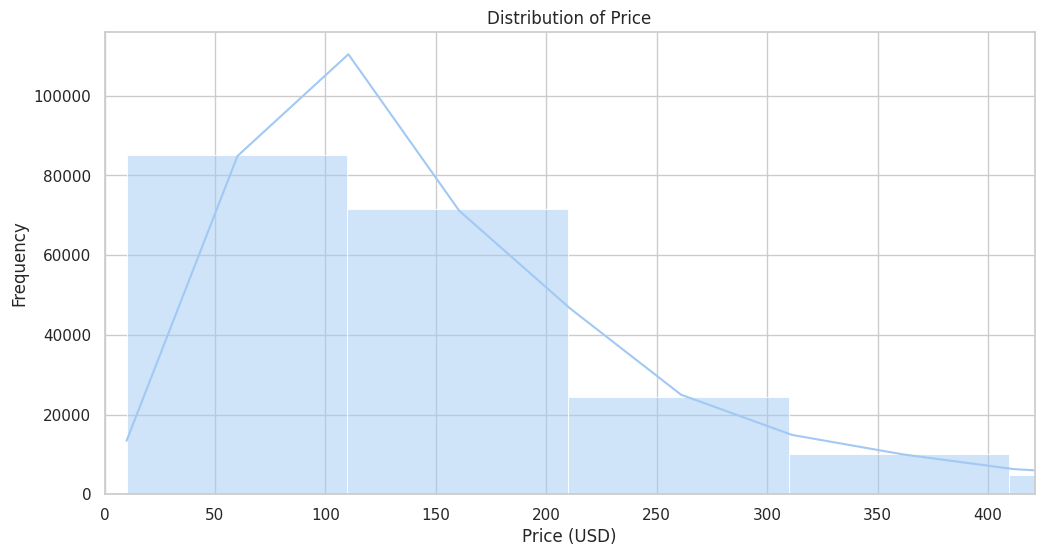

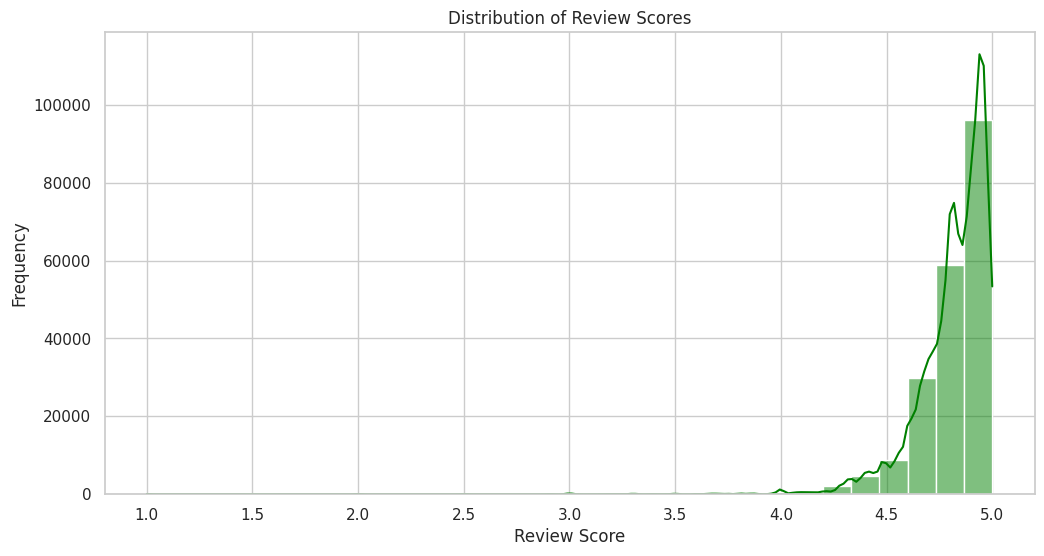

In [10]:
# Price distribution
sns.histplot(cleaned['price'], bins=100, kde=True)
plt.title("Distribution of Price")
plt.xlabel("Price (USD)")
plt.ylabel("Frequency")
plt.xlim(0, cleaned['price'].quantile(0.95))  # limit extreme outliers
plt.show()

# Review score distribution
sns.histplot(cleaned['review_scores_rating'], bins=30, kde=True, color='green')
plt.title("Distribution of Review Scores")
plt.xlabel("Review Score")
plt.ylabel("Frequency")
plt.show()


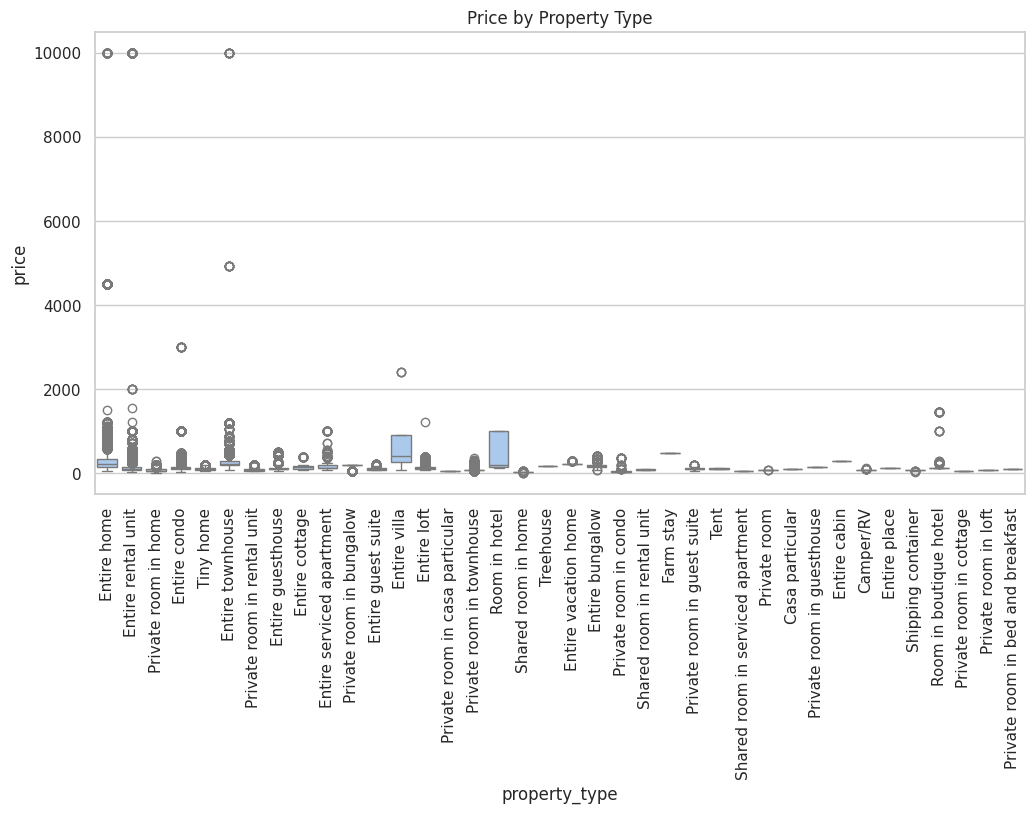

<ipython-input-11-b00851290ff1>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='room_type', y='review_scores_rating', data=cleaned, palette='Set2')


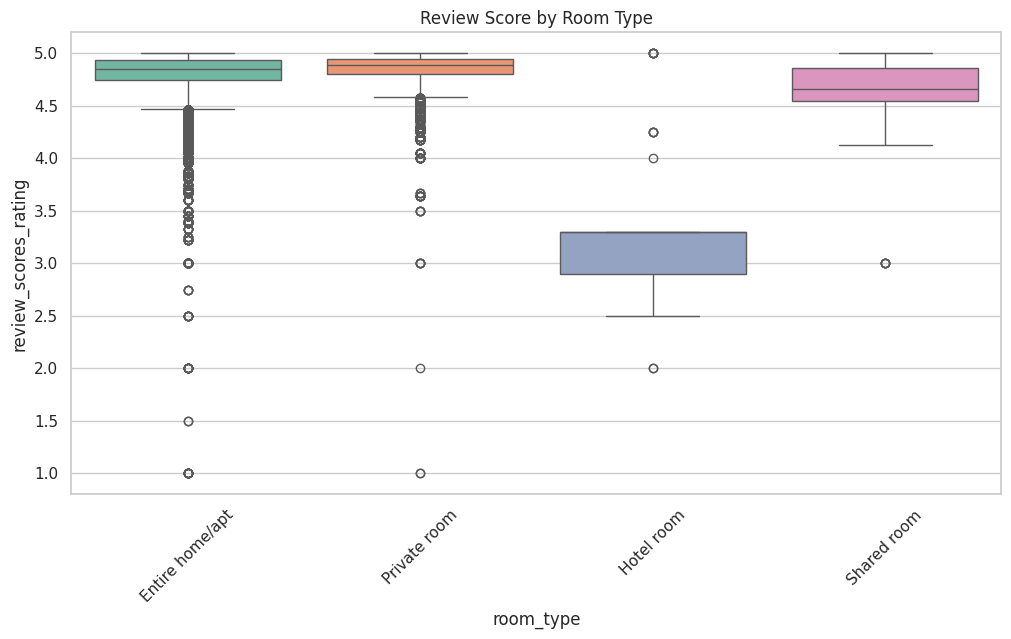

In [11]:
sns.boxplot(x='property_type', y='price', data=cleaned)
plt.xticks(rotation=90)
plt.title("Price by Property Type")
plt.show()

sns.boxplot(x='room_type', y='review_scores_rating', data=cleaned, palette='Set2')
plt.title("Review Score by Room Type")
plt.xticks(rotation=45)
plt.show()


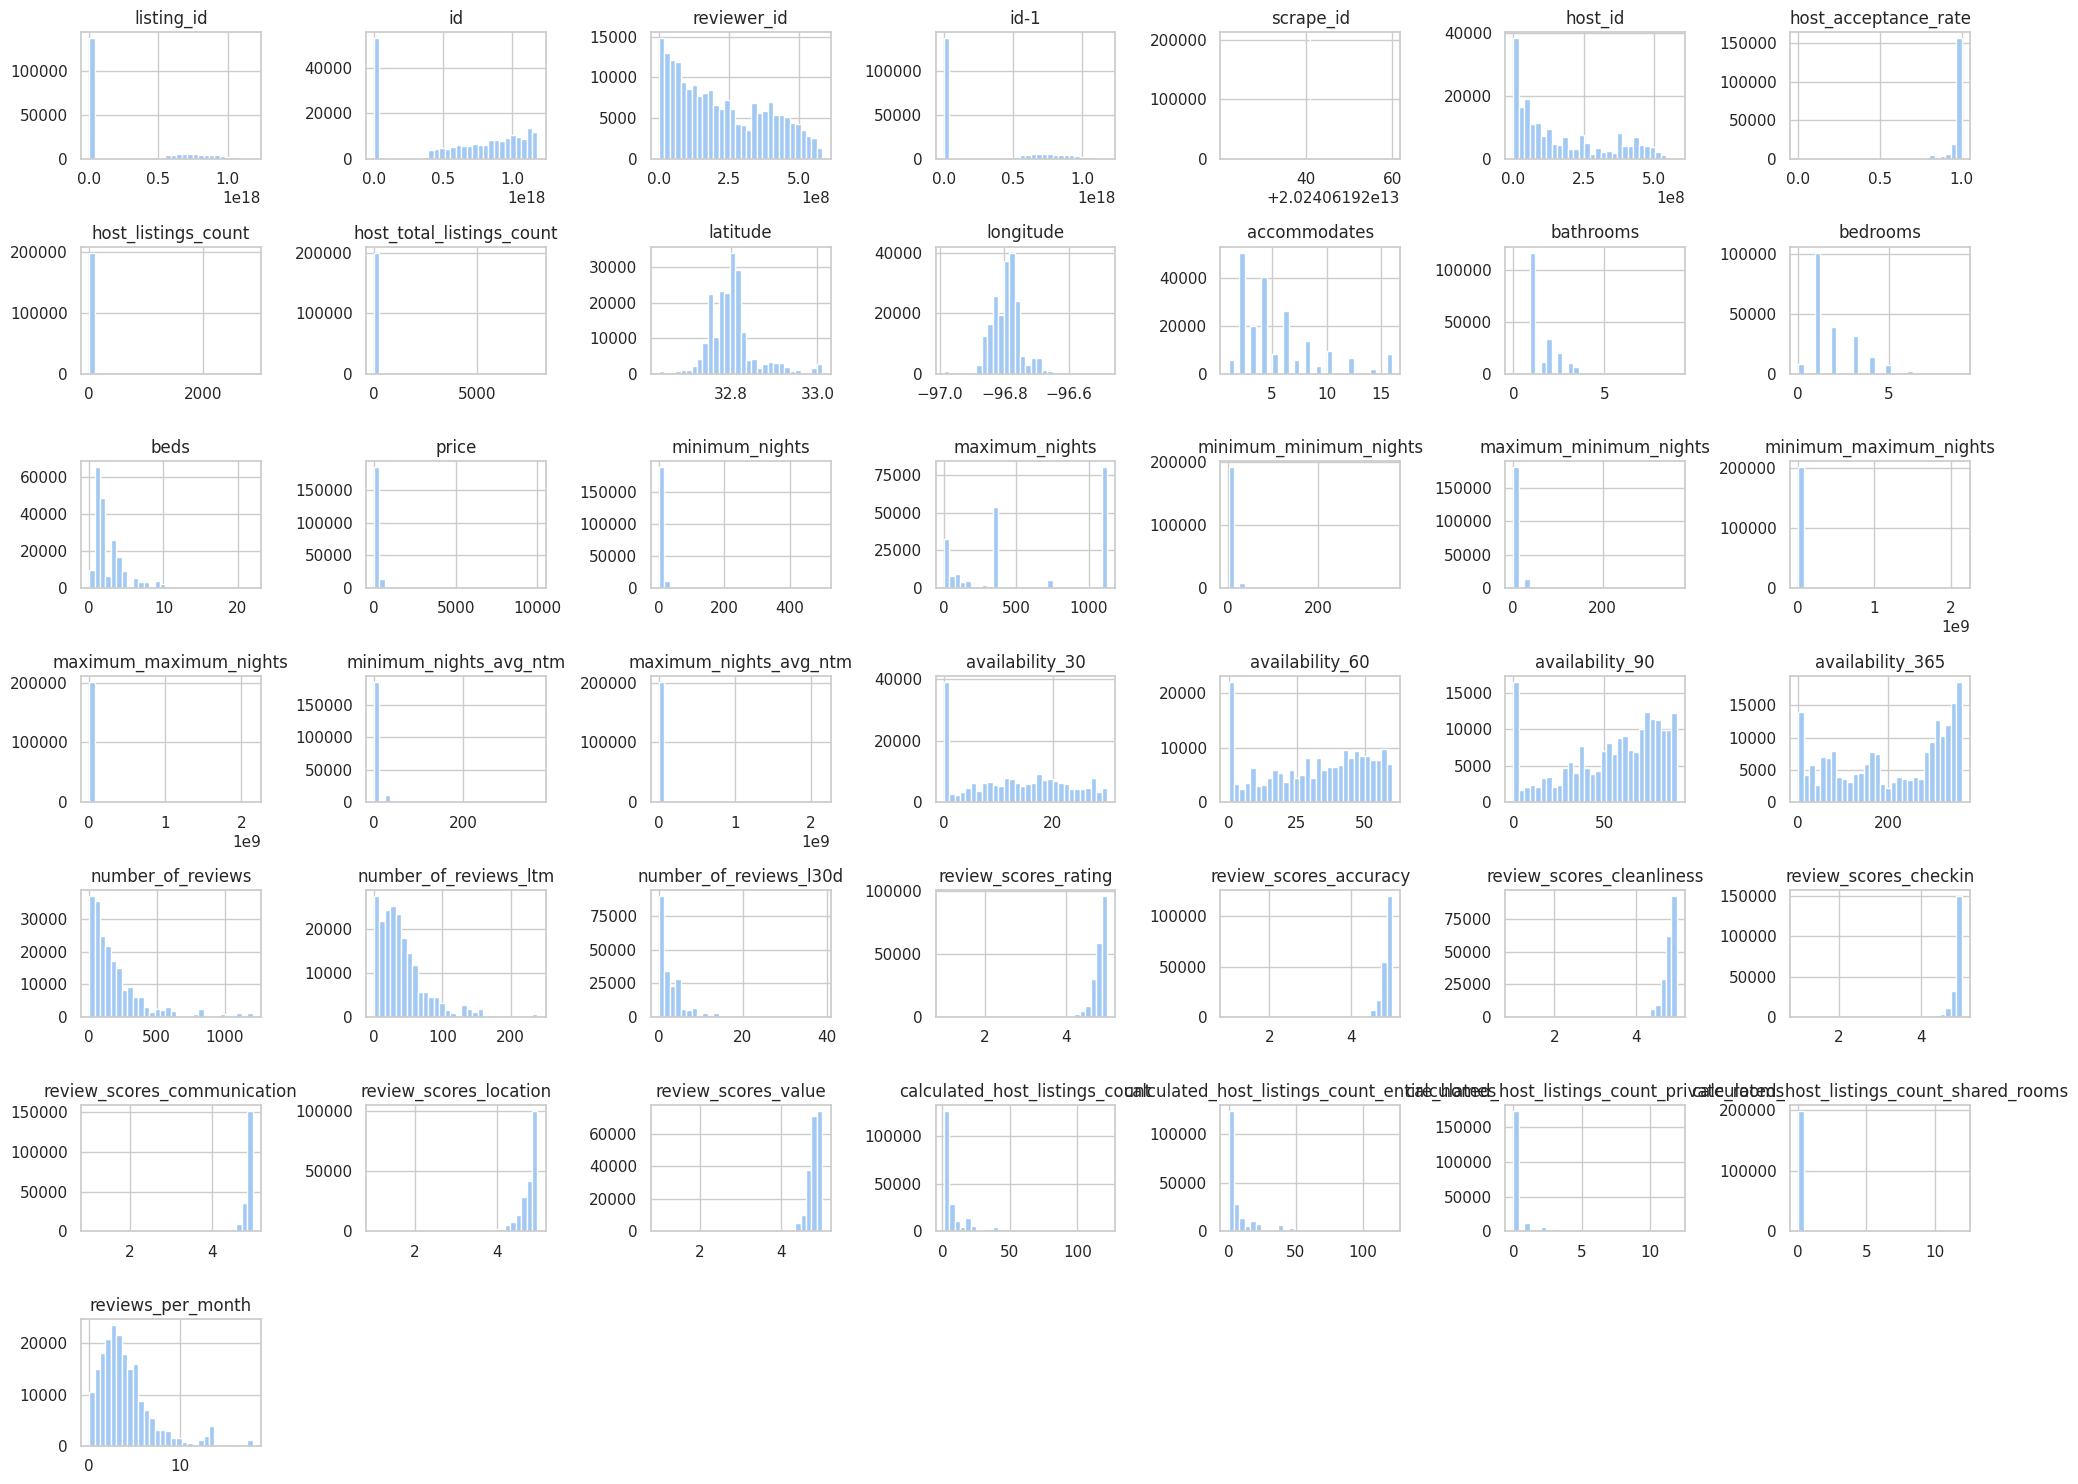

In [12]:
cleaned.hist(figsize=(20, 15), bins=30)
plt.tight_layout()
plt.show()

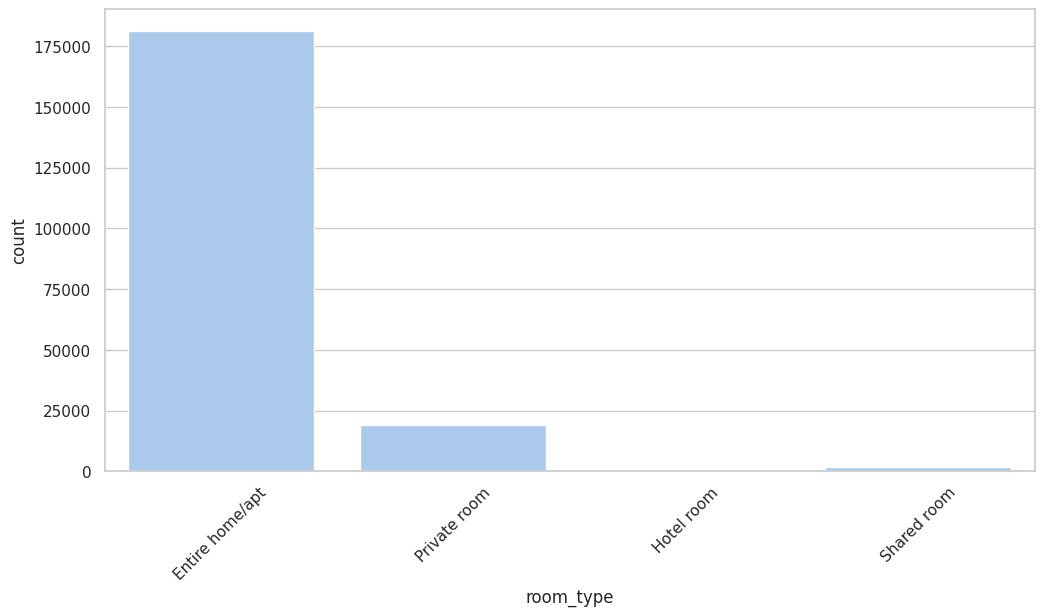

In [13]:
import seaborn as sns
sns.countplot(data=cleaned, x='room_type')
plt.xticks(rotation=45)
plt.show()

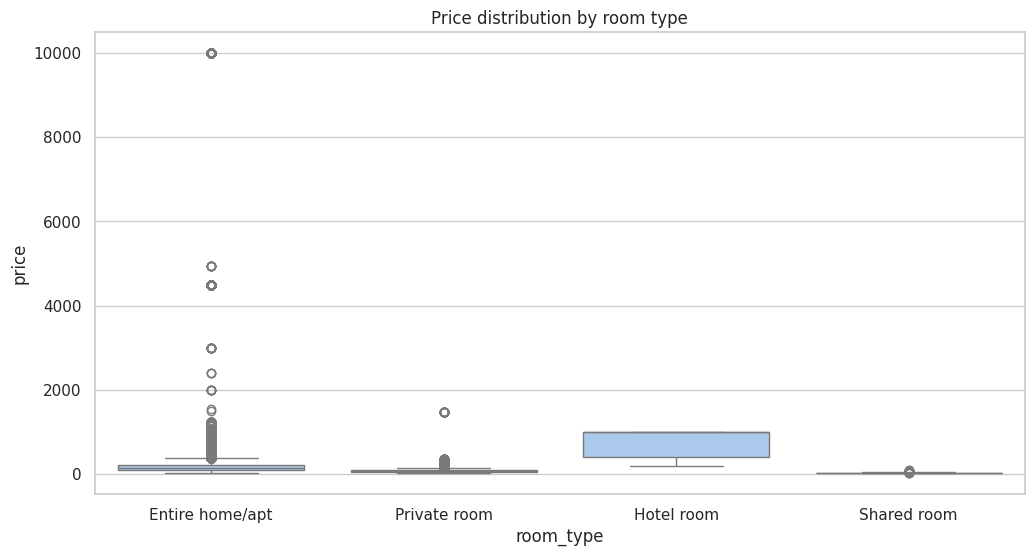

In [14]:
sns.boxplot(x='room_type', y='price', data=cleaned)
plt.title("Price distribution by room type")
plt.show()

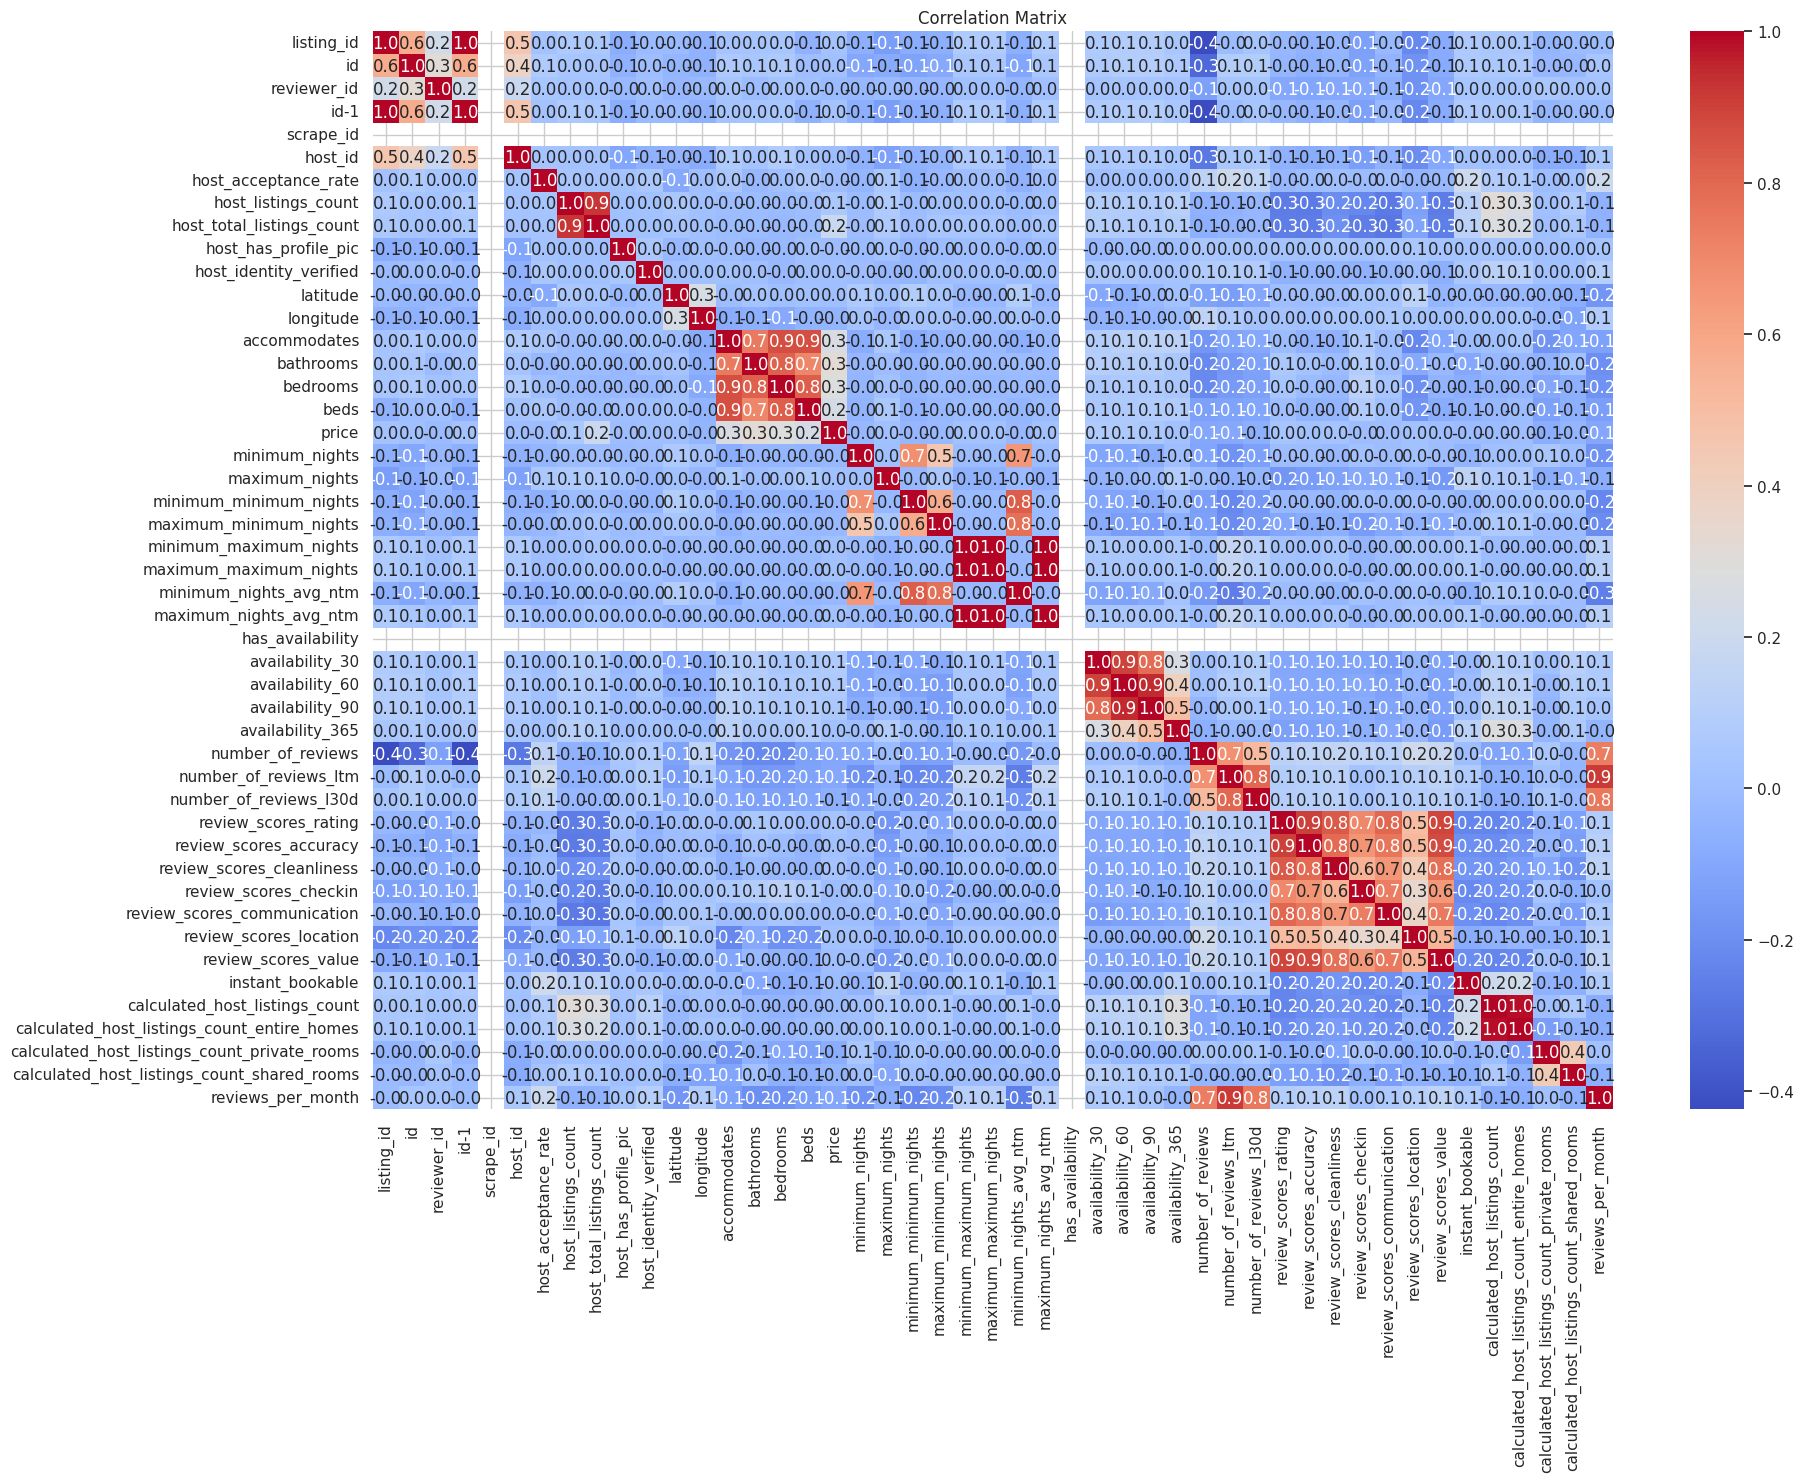

In [15]:
plt.figure(figsize=(20, 14))
sns.heatmap(cleaned.corr(numeric_only=True), annot=True, fmt='.1f', cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

**LINEAR REGRESSION : How Amenities relate to review-scores**

In [16]:
from sklearn.preprocessing import MultiLabelBinarizer
import ast
from collections import Counter

cleaned['amenities'] = cleaned['amenities'].apply(ast.literal_eval)

all_amenities = [item for sublist in cleaned['amenities'] for item in sublist]
top_amenities = [item for item, count in Counter(all_amenities).most_common(100)]
cleaned['amenities_filtered'] = cleaned['amenities'].apply(lambda x: [i for i in x if i in top_amenities])

mlb = MultiLabelBinarizer()
amenities_df = pd.DataFrame(mlb.fit_transform(cleaned['amenities_filtered']), columns=mlb.classes_, index=cleaned.index)

airbnb_cleaned = pd.concat([cleaned.drop(columns=['amenities', 'amenities_filtered']), amenities_df], axis=1)


<ipython-input-16-fee353114c0c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned['amenities'] = cleaned['amenities'].apply(ast.literal_eval)
<ipython-input-16-fee353114c0c>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned['amenities_filtered'] = cleaned['amenities'].apply(lambda x: [i for i in x if i in top_amenities])


In [17]:
print(airbnb_cleaned.shape)
print(airbnb_cleaned.columns)

(201901, 171)
Index(['listing_id', 'id', 'date', 'reviewer_id', 'reviewer_name', 'comments',
       'id-1', 'listing_url', 'scrape_id', 'last_scraped',
       ...
       'Smart lock', 'Smoke alarm', 'Stainless steel oven', 'Stove', 'TV',
       'TV with standard cable', 'Toaster', 'Washer', 'Wifi', 'Wine glasses'],
      dtype='object', length=171)


In [18]:
y = np.log(airbnb_cleaned['review_scores_rating'])

amenity_cols = list(amenities_df.columns)
x = airbnb_cleaned[amenity_cols]

import statsmodels.api as sm
x_const = sm.add_constant(x)
model = sm.OLS(y, x_const).fit()

print(model.summary())


                             OLS Regression Results                             
Dep. Variable:     review_scores_rating   R-squared:                       0.248
Model:                              OLS   Adj. R-squared:                  0.247
Method:                   Least Squares   F-statistic:                     664.4
Date:                  Wed, 07 May 2025   Prob (F-statistic):               0.00
Time:                          20:47:26   Log-Likelihood:             3.9174e+05
No. Observations:                201901   AIC:                        -7.833e+05
Df Residuals:                    201800   BIC:                        -7.822e+05
Df Model:                           100                                         
Covariance Type:              nonrobust                                         
                                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

x = airbnb_cleaned[amenity_cols]
x_const = sm.add_constant(x)

vif_df = pd.DataFrame()
vif_df['feature'] = x_const.columns
vif_df['VIF'] = [variance_inflation_factor(x_const.values, i) for i in range(x_const.shape[1])]
vif_df = vif_df.sort_values(by='VIF', ascending=False)
print(vif_df.head(15))


                     feature         VIF
0                      const  183.085516
63                    Keypad   33.339650
91                Smart lock   33.122931
67                   Lockbox   19.231056
85             Self check-in   12.617391
17           Central heating    9.977600
57                   Heating    9.469348
52     Free washer – In unit    8.401425
49      Free dryer – In unit    8.337350
1           Air conditioning    6.934485
16  Central air conditioning    6.868574
98                    Washer    6.573418
37                     Dryer    6.327664
53                   Freezer    3.305559
30               Conditioner    3.261417


In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

# ridge regression score
ridge = Ridge(alpha=1.0)
ridge.fit(x_train, y_train)

print("Ridge R² score:", ridge.score(x_test, y_test))


Ridge R² score: 0.2596853685353948


In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=6)

Dropped Variables:
Garden view
Coefficients, P-Values, and VIF:
                                             Variable  Coefficient  \
0                                           Intercept     1.571268   
1                                    Air conditioning     0.000774   
2                                           BBQ grill    -0.000236   
3                          Babysitter recommendations    -0.000049   
4                                            Backyard     0.001545   
5                                        Baking sheet     0.000466   
6                                   Barbecue utensils    -0.000343   
7                                             Bathtub    -0.002186   
8                                          Bed linens    -0.002664   
9                                             Blender     0.001296   
10                                        Board games     0.000838   
11                                          Body soap     0.002793   
12                        

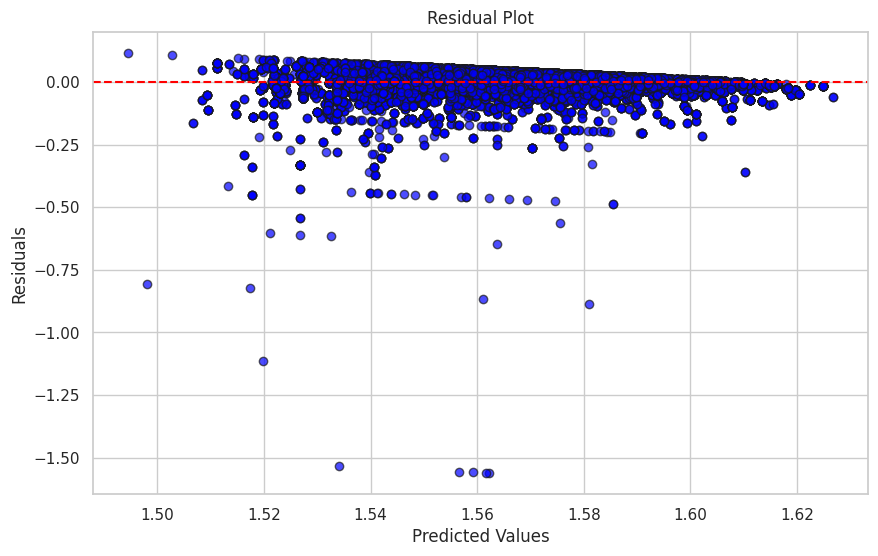

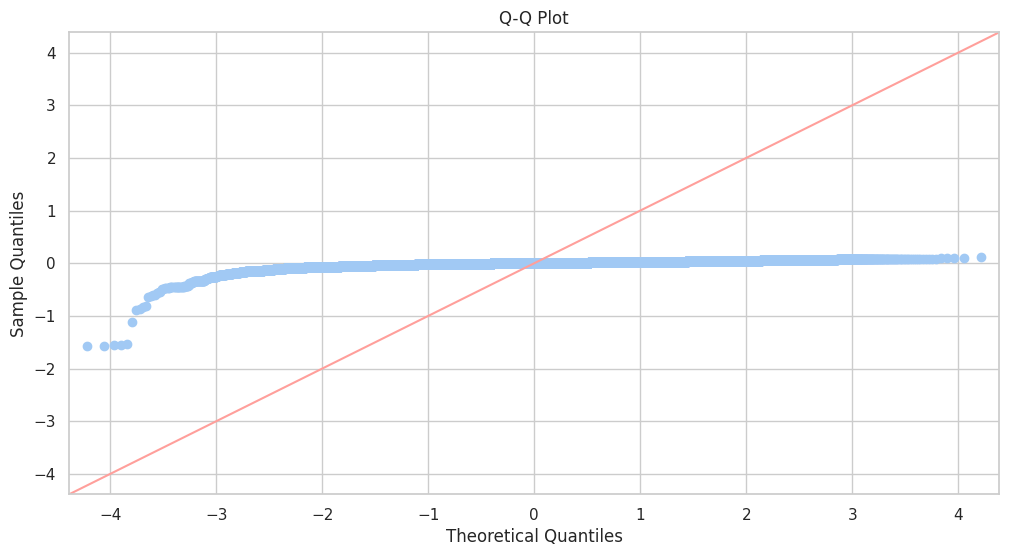

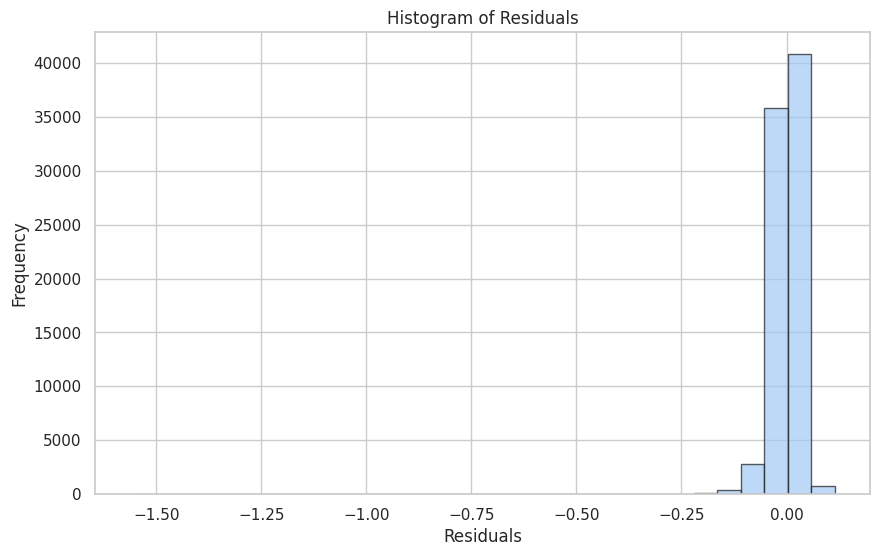

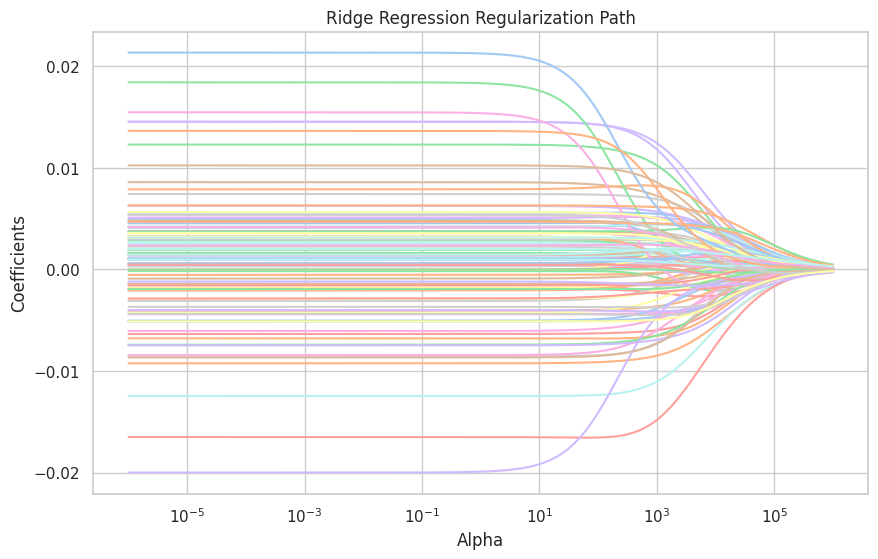

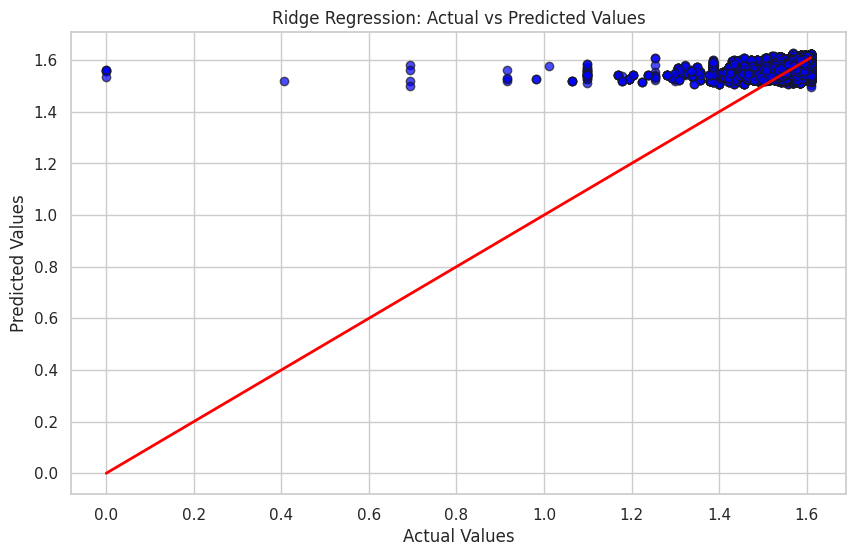

In [23]:
ridge_model = make_pipeline(StandardScaler(), Ridge(alpha=0.5))
ridge_model.fit(x_train, y_train)
y_pred_ridge = ridge_model.predict(x_test)

# Calculate cross-validation scores
cv_scores = cross_val_score(ridge_model, x_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_mse = -cv_scores.mean()

# Calculate validation errors for Ridge regression model
ME_ridge = np.mean(y_pred_ridge - y_test)
RMSE_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
MAE_ridge = mean_absolute_error(y_test, y_pred_ridge)
MPE_ridge = np.mean((y_pred_ridge - y_test) / y_test) * 100
MAPE_ridge = np.mean(np.abs((y_pred_ridge - y_test) / y_test)) * 100

# Get coefficients and corresponding variable names
coefficients = ridge_model.named_steps['ridge'].coef_
initial_variables = x_train.columns.tolist()

# Set a threshold to consider coefficients as dropped
threshold = 1e-5
retained_variables = [var for var, coef in zip(initial_variables, coefficients) if abs(coef) > threshold]
dropped_variables = [var for var, coef in zip(initial_variables, coefficients) if abs(coef) <= threshold]

# Calculate VIF for each feature in the retained variables
x_train_retained = x_train[retained_variables]
x_train_const = sm.add_constant(x_train_retained)
vif_data = pd.DataFrame()
vif_data["Variable"] = x_train_const.columns
vif_data["VIF"] = [variance_inflation_factor(x_train_const.values, i) for i in range(x_train_const.shape[1])]

# Fit a linear model using statsmodels to get p-values, AIC, and BIC
linear_model_sm = sm.OLS(y_train, x_train_const).fit()
p_values = linear_model_sm.pvalues
r_squared = linear_model_sm.rsquared
adj_r_squared = linear_model_sm.rsquared_adj
f_statistic = linear_model_sm.fvalue
aic = linear_model_sm.aic
bic = linear_model_sm.bic

# Create a DataFrame to display variable names, coefficients, p-values, and VIF
coefficients_full = [ridge_model.named_steps['ridge'].intercept_] + coefficients.tolist()
p_values_full = [None] + p_values.tolist()  # Add None for the intercept
coefficients_df = pd.DataFrame({
    'Variable': ['Intercept'] + retained_variables,
    'Coefficient': coefficients_full[:len(retained_variables) + 1],
    'P-Value': p_values_full[:len(retained_variables) + 1],
    'VIF': vif_data["VIF"]
})

# Print results
print("Dropped Variables:")
for variable in dropped_variables:
    print(variable)
print("Coefficients, P-Values, and VIF:")
print(coefficients_df)
print("\nCross-Validation MSE:", cv_mse)
print("\nValidation Errors:")
print("Mean Error (ME):", ME_ridge)
print("Root Mean Square Error (RMSE):", RMSE_ridge)
print("Mean Absolute Error (MAE):", MAE_ridge)
print("Mean Percentage Error (MPE):", MPE_ridge)
print("Mean Absolute Percentage Error (MAPE):", MAPE_ridge)
print("\nModel Statistics:")
print("R-squared:", r_squared)
print("Adjusted R-squared:", adj_r_squared)
print("F-statistic:", f_statistic)
print("AIC:", aic)
print("BIC:", bic)

ridge_ME = ME_ridge
ridge_RMSE = RMSE_ridge
ridge_MAE = MAE_ridge
ridge_MPE = MPE_ridge
ridge_MAPE = MAPE_ridge
ridge_r_squared = r_squared
ridge_adjusted_r_squared = adj_r_squared
ridge_f_statistic = f_statistic
ridge_aic = aic
ridge_bic = bic

# Residual Analysis
residuals = y_test - y_pred_ridge

# Plot the residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_ridge, residuals, color='blue', edgecolor='k', alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True)
plt.show()

# Q-Q plot for residuals
sm.qqplot(residuals, line='45')
plt.title('Q-Q Plot')
plt.grid(True)
plt.show()

# Histogram of residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.grid(True)
plt.show()

# Regularization Path
alphas = np.logspace(-6, 6, 200)
coefs = []
for a in alphas:
    ridge = Ridge(alpha=a)
    ridge.fit(x_train, y_train)
    coefs.append(ridge.coef_)

plt.figure(figsize=(10, 6))
plt.plot(alphas, coefs)
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Coefficients')
plt.title('Ridge Regression Regularization Path')
plt.grid(True)
plt.show()

# Plot the regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_ridge, color='blue', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Ridge Regression: Actual vs Predicted Values')
plt.grid(True)
plt.show()

In [31]:
y = np.log(airbnb_cleaned['price'])

amenity_cols = list(amenities_df.columns)
x = airbnb_cleaned[amenity_cols]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


Dropped Variables:
Coefficients, P-Values, and VIF:
                                              Variable  Coefficient  \
0                                            Intercept     4.914397   
1                                     Air conditioning     0.067663   
2                                            BBQ grill     0.018999   
3                           Babysitter recommendations     0.008317   
4                                             Backyard     0.038798   
5                                         Baking sheet    -0.006601   
6                                    Barbecue utensils     0.061288   
7                                              Bathtub     0.030758   
8                                           Bed linens    -0.004776   
9                                              Blender     0.017140   
10                                         Board games    -0.002540   
11                                           Body soap     0.015456   
12                       

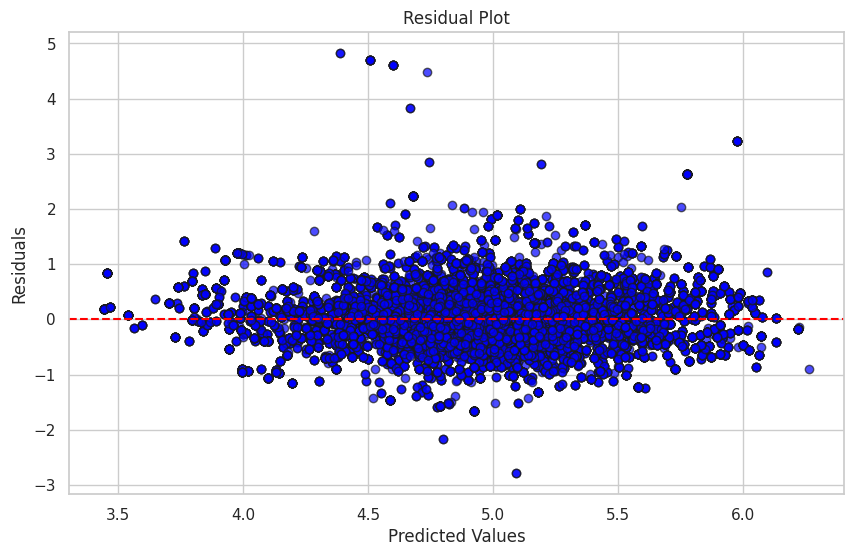

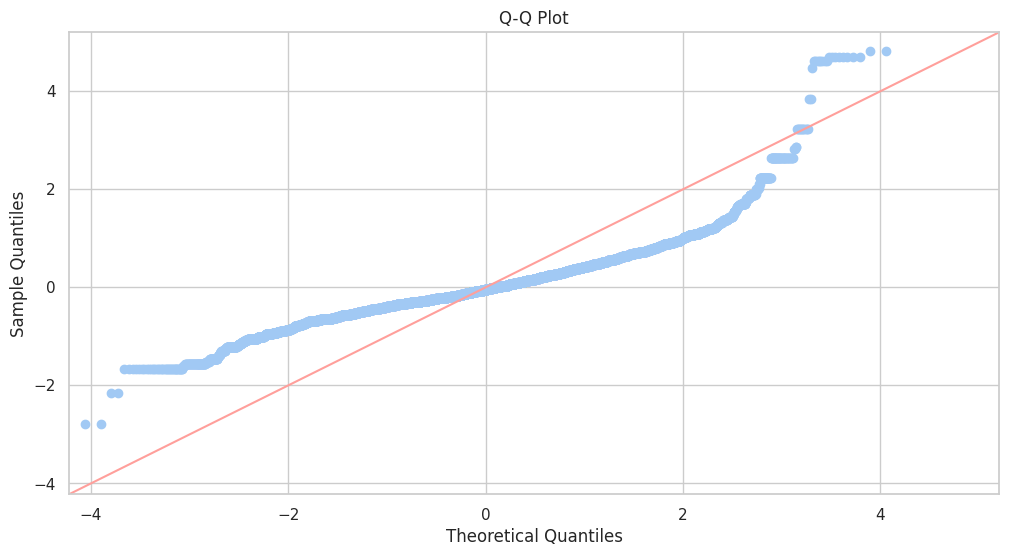

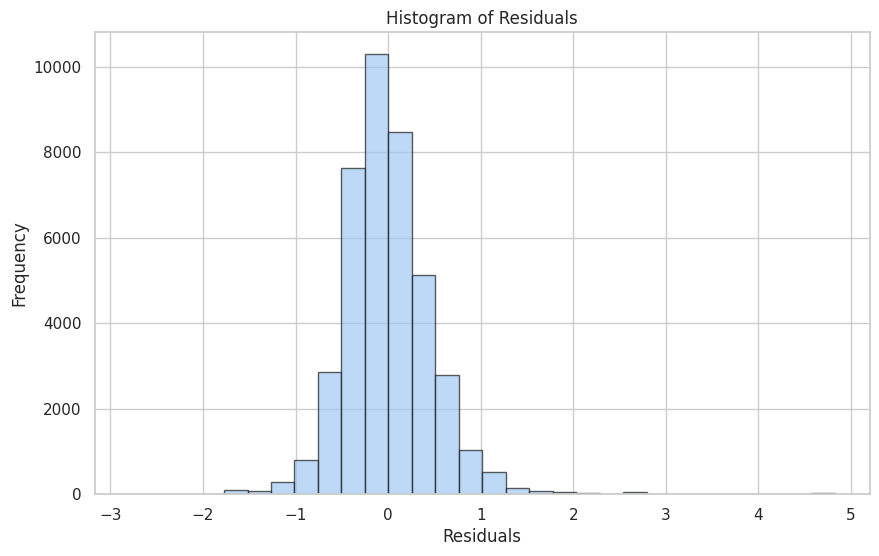

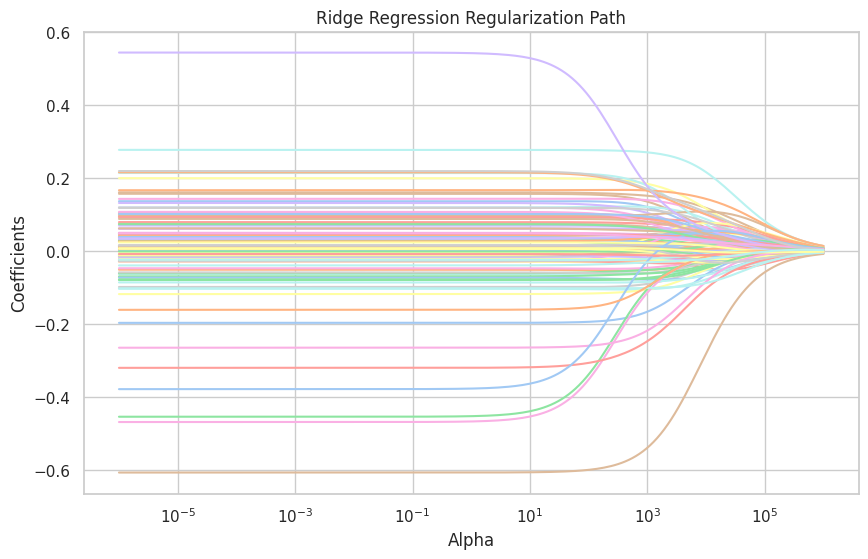

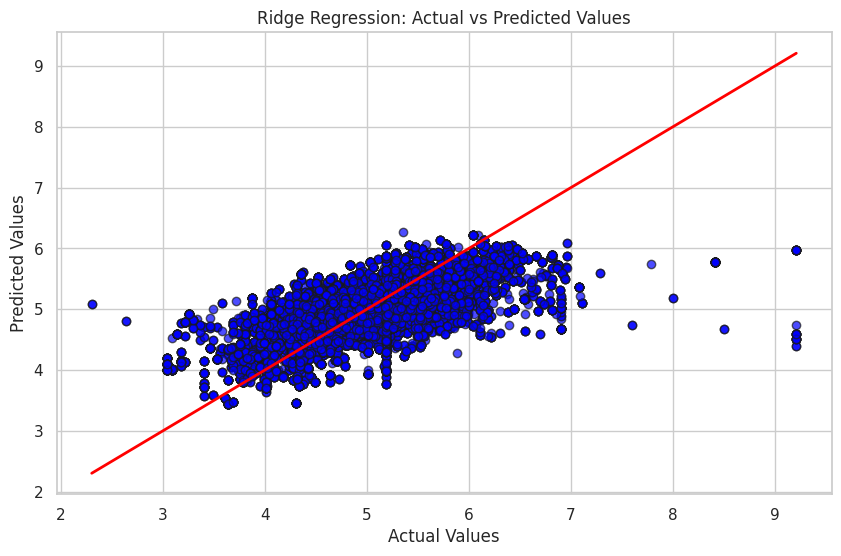

In [32]:
# ridge
ridge_model = make_pipeline(StandardScaler(), Ridge(alpha=0.5))
ridge_model.fit(x_train, y_train)
y_pred_ridge = ridge_model.predict(x_test)

# Calculate cross-validation scores
cv_scores = cross_val_score(ridge_model, x_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_mse = -cv_scores.mean()

# Calculate validation errors for Ridge regression model
ME_ridge = np.mean(y_pred_ridge - y_test)
RMSE_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
MAE_ridge = mean_absolute_error(y_test, y_pred_ridge)
MPE_ridge = np.mean((y_pred_ridge - y_test) / y_test) * 100
MAPE_ridge = np.mean(np.abs((y_pred_ridge - y_test) / y_test)) * 100

# Get coefficients and corresponding variable names
coefficients = ridge_model.named_steps['ridge'].coef_
initial_variables = x_train.columns.tolist()

# Set a threshold to consider coefficients as dropped
threshold = 1e-5
retained_variables = [var for var, coef in zip(initial_variables, coefficients) if abs(coef) > threshold]
dropped_variables = [var for var, coef in zip(initial_variables, coefficients) if abs(coef) <= threshold]

# Calculate VIF for each feature in the retained variables
x_train_retained = x_train[retained_variables]
x_train_const = sm.add_constant(x_train_retained)
vif_data = pd.DataFrame()
vif_data["Variable"] = x_train_const.columns
vif_data["VIF"] = [variance_inflation_factor(x_train_const.values, i) for i in range(x_train_const.shape[1])]

# Fit a linear model using statsmodels to get p-values, AIC, and BIC
linear_model_sm = sm.OLS(y_train, x_train_const).fit()
p_values = linear_model_sm.pvalues
r_squared = linear_model_sm.rsquared
adj_r_squared = linear_model_sm.rsquared_adj
f_statistic = linear_model_sm.fvalue
aic = linear_model_sm.aic
bic = linear_model_sm.bic

# Create a DataFrame to display variable names, coefficients, p-values, and VIF
coefficients_full = [ridge_model.named_steps['ridge'].intercept_] + coefficients.tolist()
p_values_full = [None] + p_values.tolist()  # Add None for the intercept
coefficients_df = pd.DataFrame({
    'Variable': ['Intercept'] + retained_variables,
    'Coefficient': coefficients_full[:len(retained_variables) + 1],
    'P-Value': p_values_full[:len(retained_variables) + 1],
    'VIF': vif_data["VIF"]
})

# Print results
print("Dropped Variables:")
for variable in dropped_variables:
    print(variable)
print("Coefficients, P-Values, and VIF:")
print(coefficients_df)
print("\nCross-Validation MSE:", cv_mse)
print("\nValidation Errors:")
print("Mean Error (ME):", ME_ridge)
print("Root Mean Square Error (RMSE):", RMSE_ridge)
print("Mean Absolute Error (MAE):", MAE_ridge)
print("Mean Percentage Error (MPE):", MPE_ridge)
print("Mean Absolute Percentage Error (MAPE):", MAPE_ridge)
print("\nModel Statistics:")
print("R-squared:", r_squared)
print("Adjusted R-squared:", adj_r_squared)
print("F-statistic:", f_statistic)
print("AIC:", aic)
print("BIC:", bic)

ridge_ME = ME_ridge
ridge_RMSE = RMSE_ridge
ridge_MAE = MAE_ridge
ridge_MPE = MPE_ridge
ridge_MAPE = MAPE_ridge
ridge_r_squared = r_squared
ridge_adjusted_r_squared = adj_r_squared
ridge_f_statistic = f_statistic
ridge_aic = aic
ridge_bic = bic

# Residual Analysis
residuals = y_test - y_pred_ridge

# Plot the residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_ridge, residuals, color='blue', edgecolor='k', alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True)
plt.show()

# Q-Q plot for residuals
sm.qqplot(residuals, line='45')
plt.title('Q-Q Plot')
plt.grid(True)
plt.show()

# Histogram of residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.grid(True)
plt.show()

# Regularization Path
alphas = np.logspace(-6, 6, 200)
coefs = []
for a in alphas:
    ridge = Ridge(alpha=a)
    ridge.fit(x_train, y_train)
    coefs.append(ridge.coef_)

plt.figure(figsize=(10, 6))
plt.plot(alphas, coefs)
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Coefficients')
plt.title('Ridge Regression Regularization Path')
plt.grid(True)
plt.show()

# Plot the regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_ridge, color='blue', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Ridge Regression: Actual vs Predicted Values')
plt.grid(True)
plt.show()

**SENTIMENT ANALYSIS-VADER**

In [33]:
import os
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download VADER lexicon for sentiment analysis
nltk.download('vader_lexicon')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 20)
pd.set_option('display.width', 1000)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [34]:
# Define the text column containing review text
text_column = 'comments'

# Define the hotel property column name
cleaned['listing_id'] = cleaned['listing_id'].astype(str)
hotel_column = 'listing_id'

print(f"Using '{text_column}' as the text column for reviews.")
print(f"Using '{hotel_column}' as the hotel property name column.")

Using 'comments' as the text column for reviews.
Using 'listing_id' as the hotel property name column.


<ipython-input-34-ad66004556df>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned['listing_id'] = cleaned['listing_id'].astype(str)


In [35]:
# Function to get sentiment scores using VADER
def get_vader_sentiment(text):
    if pd.isna(text) or not isinstance(text, str):
        return np.nan, np.nan, np.nan, np.nan

    # Initialize the VADER sentiment analyzer
    sid = SentimentIntensityAnalyzer()

    # Get sentiment scores
    scores = sid.polarity_scores(text)

    return scores['neg'], scores['neu'], scores['pos'], scores['compound']

# Apply sentiment analysis to the review text
if text_column in cleaned.columns:
    # Apply the VADER sentiment analysis function to the text column
    cleaned['vader_negative'], cleaned['vader_neutral'], cleaned['vader_positive'], cleaned['vader_compound'] = zip(*cleaned[text_column].apply(get_vader_sentiment))

    # Display the results
    print("VADER sentiment analysis completed.")
    display(cleaned[[text_column, 'vader_negative', 'vader_neutral', 'vader_positive', 'vader_compound']].head())
else:
    print(f"Error: The text column '{text_column}' was not found in the dataframe.")
    print("Available columns:", cleaned.columns.tolist())

VADER sentiment analysis completed.


<ipython-input-35-cac33508dfa9>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned['vader_negative'], cleaned['vader_neutral'], cleaned['vader_positive'], cleaned['vader_compound'] = zip(*cleaned[text_column].apply(get_vader_sentiment))
<ipython-input-35-cac33508dfa9>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned['vader_negative'], cleaned['vader_neutral'], cleaned['vader_positive'], cleaned['vader_compound'] = zip(*cleaned[text_column].apply(get_vader_sentiment))
<ipython-input-35-cac335

comments  vader_negative  vader_neutral  vader_positive  vader_compound
0  Cute modern stay. Love the little touches thro...             0.0          0.530           0.470          0.9612
1  Very clean, well decorated and spacious Airbnb...             0.0          0.554           0.446          0.9357
2  Great place to stay for our group of 5.  Clean...             0.0          0.498           0.502          0.8779
3  Lovely place, clean spaces, it has everything ...             0.0          0.543           0.457          0.8777
4  The rooftop lounging space was perfect. The ho...             0.0          0.637           0.363          0.9535


VADER Sentiment distribution:
vader_sentiment_category
Very Positive    146719
Positive          43646
Neutral            8174
Negative           2247
Very Negative      1115
Name: count, dtype: int64


<ipython-input-36-5c21f7d828fe>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned['vader_sentiment_category'] = cleaned['vader_compound'].apply(categorize_vader_sentiment)


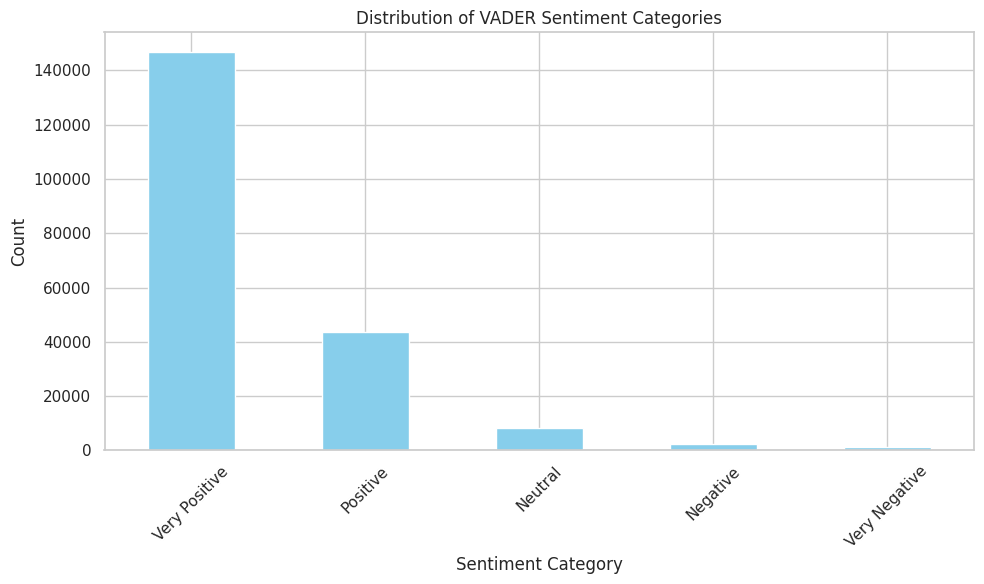

In [36]:
def categorize_vader_sentiment(compound):
    if pd.isna(compound):
        return 'Unknown'
    if compound <= -0.75:
        return 'Very Negative'
    elif compound <= -0.25:
        return 'Negative'
    elif compound < 0.25:
        return 'Neutral'
    elif compound < 0.75:
        return 'Positive'
    else:
        return 'Very Positive'

# Add sentiment category column
if 'vader_compound' in cleaned.columns:
    cleaned['vader_sentiment_category'] = cleaned['vader_compound'].apply(categorize_vader_sentiment)

    # Display distribution of sentiment categories
    sentiment_counts = cleaned['vader_sentiment_category'].value_counts()
    print("\nVADER Sentiment distribution:")
    print(sentiment_counts)

    # Visualize sentiment distribution
    plt.figure(figsize=(10, 6))
    sentiment_counts.plot(kind='bar', color='skyblue')
    plt.title('Distribution of VADER Sentiment Categories')
    plt.xlabel('Sentiment Category')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


Hotel Property Summary (sorted by average VADER sentiment):


listing_id  Avg_Sentiment  Median_Sentiment  Sentiment_StdDev  Review_Count  Avg_Positivity  Avg_Negativity Sentiment_Distribution
0  1075417795211285094         0.9973            0.9973               NaN             1           0.417           0.000   {'Very Positive': 1}
1  1024875699864224379         0.9962            0.9962               NaN             1           0.363           0.011   {'Very Positive': 1}
2   675179607944046016         0.9959            0.9959               NaN             1           0.278           0.007   {'Very Positive': 1}
3  1147412623692850553         0.9958            0.9958               NaN             1           0.278           0.000   {'Very Positive': 1}
4             53559523         0.9949            0.9949               NaN             1           0.236           0.017   {'Very Positive': 1}
5  1162288254064736391        -0.8479           -0.8479               NaN             1           0.059           0.180   {'Very Negative': 1}
6   995503522449302589        -0.9198           -0.9198               NaN             1           0.011           0.131   {'Very Negative': 1}
7             53722424        -0.9205           -0.9205               NaN             1           0.012           0.134   {'Very Negative': 1}
8  1117604076217244261        -0.9254           -0.9254               NaN             1           0.026           0.248   {'Very Negative': 1}
9  1099274910736485673        -0.9277           -0.9277               NaN             1           0.019           0.120   {'Very Negative': 1}

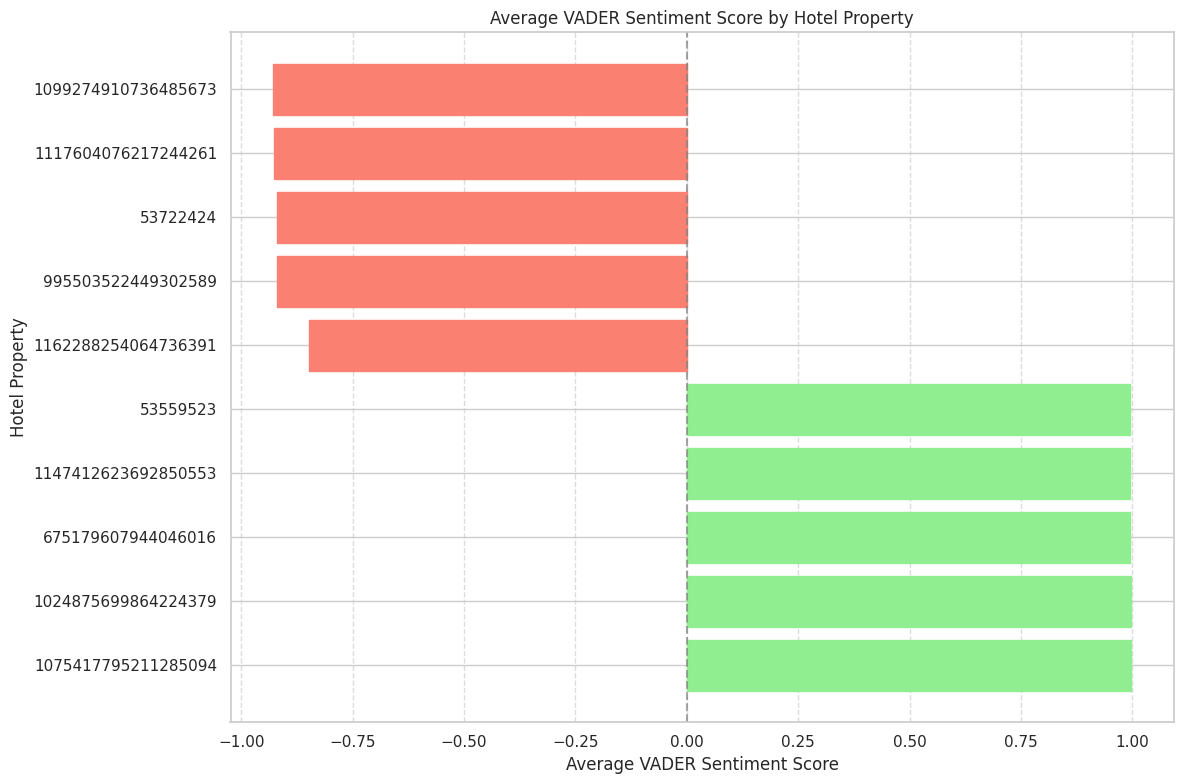

In [37]:
# Aggregate sentiment scores by hotel property
if hotel_column in cleaned.columns and 'vader_compound' in cleaned.columns and 'vader_sentiment_category' in cleaned.columns:
    # Group by hotel property
    hotel_summary = cleaned.groupby(hotel_column).agg({
        'vader_compound': ['mean', 'median', 'std', 'count'],
        'vader_positive': ['mean'],
        'vader_negative': ['mean'],
        'vader_sentiment_category': lambda x: x.value_counts().to_dict()
    }).reset_index()

    # Flatten multi-level column names
    hotel_summary.columns = ['_'.join(col).strip('_') for col in hotel_summary.columns.values]

    # Rename columns for clarity
    hotel_summary = hotel_summary.rename(columns={
        f'{hotel_column}_': 'Hotel_Name',
        'vader_compound_mean': 'Avg_Sentiment',
        'vader_compound_median': 'Median_Sentiment',
        'vader_compound_std': 'Sentiment_StdDev',
        'vader_compound_count': 'Review_Count',
        'vader_positive_mean': 'Avg_Positivity',
        'vader_negative_mean': 'Avg_Negativity',
        'vader_sentiment_category_<lambda>': 'Sentiment_Distribution'
    })

    # Sort by average sentiment score (descending)
    hotel_summary = hotel_summary.sort_values('Avg_Sentiment', ascending=False)
    # Keep only top 5 and bottom 5
    top_5 = hotel_summary.head(5)
    bottom_5 = hotel_summary.tail(5)
    hotel_summary = pd.concat([top_5, bottom_5], ignore_index=True)


    # Display the summary
    print("\nHotel Property Summary (sorted by average VADER sentiment):")
    display(hotel_summary)

    # Create a new column for the most common sentiment category
    def get_most_common_sentiment(sentiment_dict):
        if not sentiment_dict:
            return 'Unknown'
        return max(sentiment_dict.items(), key=lambda x: x[1])[0]

    hotel_summary['Most_Common_Sentiment'] = hotel_summary['Sentiment_Distribution'].apply(get_most_common_sentiment)

    # Create visualization of average sentiment by hotel
    plt.figure(figsize=(12, 8))
    bars = plt.barh(hotel_summary['listing_id'], hotel_summary['Avg_Sentiment'], color='skyblue')

    # Color the bars based on sentiment (red for negative, green for positive)
    for i, bar in enumerate(bars):
        if hotel_summary['Avg_Sentiment'].iloc[i] < 0:
            bar.set_color('salmon')
        else:
            bar.set_color('lightgreen')

    plt.axvline(x=0, color='gray', linestyle='--', alpha=0.7)
    plt.xlabel('Average VADER Sentiment Score')
    plt.ylabel('Hotel Property')
    plt.title('Average VADER Sentiment Score by Hotel Property')
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
else:
    if hotel_column not in df.columns:
        print(f"Error: The hotel column '{hotel_column}' was not found in the dataframe.")
    else:
        print("Cannot perform hotel aggregation without VADER sentiment analysis results.")

In [38]:
# Convert selected IDs to string
selected_ids = [
    "1075417795211285094", "1024875699864224379", "675179607944046016",
    "1147412623692850553", "53559523", "1162288254064736391",
    "995503522449302589", "53722424", "1117604076217244261", "1099274910736485673"
]

# Convert listing_id column to string
cleaned['listing_id'] = cleaned['listing_id'].astype(str)

# Filter
filtered_comments = cleaned[cleaned['listing_id'].isin(selected_ids)]
pd.set_option('display.max_colwidth', None)
display(filtered_comments[['listing_id', 'comments']].head(10))


<ipython-input-38-4a54bf8e7d53>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned['listing_id'] = cleaned['listing_id'].astype(str)


listing_id  \
14980              53722424   
40866              53559523   
68586    675179607944046016   
77810    995503522449302589   
87450   1099274910736485673   
95185   1024875699864224379   
95543   1117604076217244261   
96352   1075417795211285094   
102414  1147412623692850553   
136508  1162288254064736391   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       comments  
14980                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          I did not get to stay in this unit. I booked the unit the night before and was later sent a request to pay an additional $200 from the host who asked if I receivedthe request. I declined and told her I was not sure why I would pay an extra 200 afterI had already booked the unit. The host responded saying she understood and she was sorry for the inconvenience. The next morning when I went to check into the unit I was unable to even though I had paid and my reservation was not canceled. The host was rude and wouldn't cancel my reservation and refused to let me use the unit since I declinedto pay an additional 200. I had to contact airbnb to step in and they refunded me. I'd hate for this to happen to anyone else.  
40866   I absolutely loved Lauren's condo in Dallas! Lauren was an amazing host who went above and beyond what we could've expected. She answered all my questions in a timely manner, was very resourceful, and helped us get adjusted to the new scenery after driving for over 24 hrs to get there.<br/> <br/>The place itself is very clean, modern, and has everything you could possibly think of to stay for a few months. The kitchen is fully equipped with spices, oils, pots and pans, and more kitchen appliances than I probably used. Had no issues with any of the kitchen appliances.  The living room was in great condition with a comfortable couch and a nice big TV. The laundry works perfectly and had no issues. The bathroom and bedroom were both clean and tastefully decorated. There's lots of closet and storage space for all your belongings needed for the time being. <br/>The neighborhood was good. The neighbors were very welcoming and friendly.  The pool area was always clean and well-kept. The bbq worked well and we definitely enjoyed our fair share of outdoor time. There is a grocery store and gas s

In [39]:
# Install and import wordcloud and additional NLP tools
!pip install wordcloud nltk
from wordcloud import WordCloud
from collections import Counter
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

# Define English stopwords
stop_words = set(stopwords.words('english'))
# Add additional common words that aren't meaningful for sentiment analysis
additional_stopwords = {'hotel', 'room', 'rooms', 'stayed', 'stay', 'would', 'could', 'one', 'also', 'get', 'got', 'day', 'night', 'airbnb'}
stop_words.update(additional_stopwords)

# Function to generate word clouds for reviews by sentiment with meaningful word extraction
def generate_word_cloud(texts, title, color_map='viridis'):
    # Combine all text
    combined_text = " ".join(texts.dropna())

    if not combined_text.strip():
        print(f"No text available for {title}")
        return None

    # For VADER analysis we keep original text intact
    # But for visualization and word frequency, we remove stopwords

    # Tokenize the text
    words = word_tokenize(combined_text.lower())

    # Filter out stopwords and short words for meaningful analysis
    meaningful_words = [word for word in words if word.isalpha() and word not in stop_words and len(word) > 2]
    meaningful_text = " ".join(meaningful_words)

    # Create and display meaningful word cloud (without stopwords)
    wordcloud = WordCloud(width=800, height=400,
                         background_color='white',
                         colormap=color_map,
                         max_words=100,
                         contour_width=1,
                         contour_color='steelblue')

    # Generate word cloud with meaningful words only
    wordcloud.generate(meaningful_text)

    # Display word cloud
    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Meaningful Words in {title}", fontsize=16)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

    # Count meaningful word frequency
    meaningful_word_freq = Counter(meaningful_words)

    print(f"\nMost frequent meaningful words in {title}:")
    for word, count in meaningful_word_freq.most_common(15):
        print(f"{word}: {count}")

    # Optional: Also show all words for comparison
    # But this is commented out to avoid cluttering the output
    """
    # Count all word frequency (including stopwords)
    all_word_freq = Counter(re.findall(r'\b[\w\']+\b', combined_text.lower()))

    print(f"\nAll words (including stopwords) in {title}:")
    for word, count in all_word_freq.most_common(15):
        print(f"{word}: {count}")
    """

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Found 190321 positive reviews


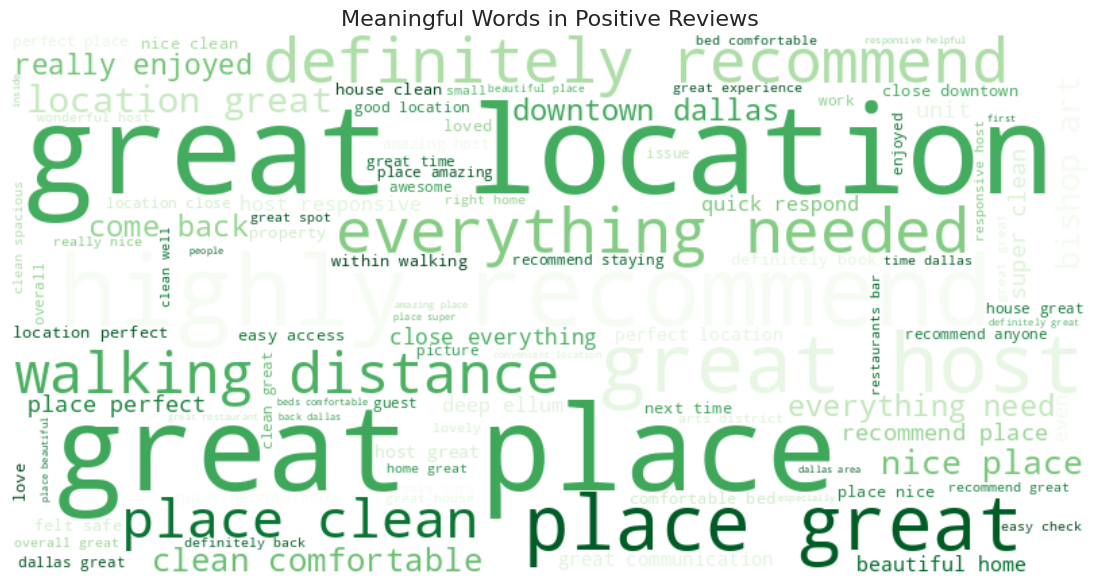


Most frequent meaningful words in Positive Reviews:
great: 112543
place: 92110
clean: 50756
location: 49735
host: 39019
nice: 35395
home: 34234
dallas: 34218
definitely: 32597
house: 32361
everything: 31805
recommend: 27807
comfortable: 27712
perfect: 25925
beautiful: 20770
Found 3322 negative reviews


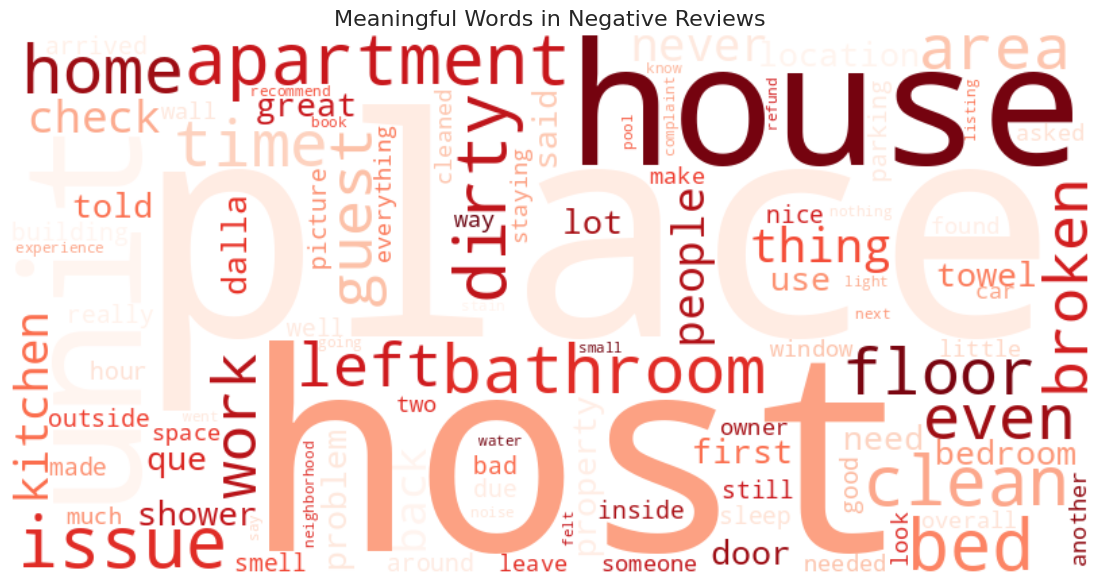


Most frequent meaningful words in Negative Reviews:
place: 1429
host: 1184
house: 754
dirty: 604
door: 577
like: 570
unit: 562
clean: 528
apartment: 528
bed: 516
location: 495
time: 493
even: 448
home: 442
broken: 440
Found 8258 neutral reviews


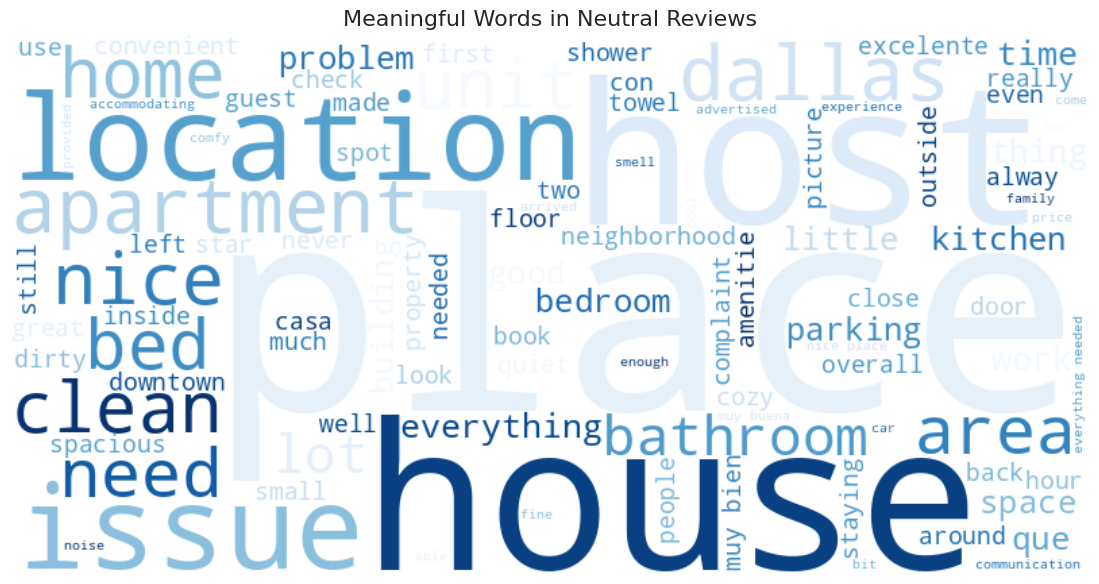


Most frequent meaningful words in Neutral Reviews:
place: 1508
muy: 1011
location: 636
host: 590
house: 544
everything: 544
dallas: 500
excelente: 459
nice: 455
great: 431
home: 404
todo: 404
clean: 394
close: 374
lugar: 373


In [40]:
# Categorize reviews by sentiment for visualization
if 'vader_compound' in cleaned.columns and text_column in cleaned.columns:
    # Positive reviews (compound score > 0.25)
    positive_reviews = cleaned[cleaned['vader_compound'] > 0.25][text_column]
    print(f"Found {len(positive_reviews)} positive reviews")
    generate_word_cloud(positive_reviews, "Positive Reviews", 'Greens')

    # Negative reviews (compound score < -0.25)
    negative_reviews = cleaned[cleaned['vader_compound'] < -0.25][text_column]
    print(f"Found {len(negative_reviews)} negative reviews")
    generate_word_cloud(negative_reviews, "Negative Reviews", 'Reds')

    # Neutral reviews
    neutral_reviews = cleaned[(cleaned['vader_compound'] >= -0.25) & (cleaned['vader_compound'] <= 0.25)][text_column]
    print(f"Found {len(neutral_reviews)} neutral reviews")
    generate_word_cloud(neutral_reviews, "Neutral Reviews", 'Blues')
else:
    print("Cannot generate word clouds without VADER sentiment scores.")

**SENTIMENT ANALYSIS-R0BERTA**

In [41]:
# Install required packages if not already installed
!pip install pandas openpyxl matplotlib nltk transformers torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 146.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 125.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 49.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 48.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 22.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 126.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvji

In [42]:
import os
import nltk
import re
import torch
from transformers import AutoModelForSequenceClassification, AutoTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Download NLTK resources
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')  # Only for word cloud visualization

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 20)
pd.set_option('display.width', 1000)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [43]:
# Examine the structure of the dataframe
print("Column names:")
print(cleaned.columns.tolist())

# Basic statistics
print("\nBasic statistics:")
cleaned.describe(include='all')

Column names:
['listing_id', 'id', 'date', 'reviewer_id', 'reviewer_name', 'comments', 'id-1', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name', 'description', 'picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_thumbnail_url', 'host_picture_url', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood_cleansed', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'calendar_last_scraped', 'number_of_reviews', 'number_of_reviews_ltm',

listing_id            id      date   reviewer_id reviewer_name     comments          id-1                            listing_url     scrape_id last_scraped       source                                        name                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      description                                                                picture_url       host_id                                    host_url host_name  host_since host_response_time host_response_rate  host_acceptance_rate  \
count      201901  2.019010e+05    201901  2.019010e+05        201901       201901  2.019010e+05                                 201901  2.019010e+05       201901       201901                                      201901                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           201901                                                                     201901  2.019010e+05                                      201901    201901      201901             201901             201901         201901.000000   
unique       4160           NaN      3592           NaN         30923       191473           NaN                                   4160           NaN            2            2                                        4045                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             3533                                                                       4096           NaN                                        1896      1319        1530                  4                 44                   NaN   
top      15342315           NaN  4/9/2024           NaN       Michael  Great place           NaN  https://www.airbnb.com/rooms/15342315           NaN    6/20/2024  city scrape  Charming Cabin Near Deep Ellum & Fair Park  Walking distance to the Bishop Arts District, this unit is one of the area's premier residences. If you appreciate great architecture, custom details and want a boutique guest experience there isn't a better place. Easy access to all major highways, downtown Dallas and walking distance to the areas best amenities. Non-smoking. Other lofts available if your required dates show as booked. PLEASE NOTE: PARTIES AND EVENTS ARE NOT PERMITTED AND QUIET HOURS (10:30p - 6:30a) ARE STRICTLY ENFORCED.  https://a0.muscache.com/pictures/d58a05e2-6baa-4c68-a296-0eec8da757c3.jpg           NaN  https://www.airbnb.com/users/show/10901678      Vera  12/30/2013     within an hour               100%                   NaN   
freq         1207           NaN       705           NaN          1597          519           NaN                                   1207           NaN       168306       195493                                        1207                                                

In [44]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [45]:
# Define a text preprocessing function that only applies lemmatization
def preprocess_text(text):
    if pd.isna(text) or not isinstance(text, str):
        return ""

    # Tokenize
    tokens = word_tokenize(text)

    # Lemmatize (but don't remove stopwords or apply stemming)
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Join tokens back to string
    preprocessed_text = ' '.join(lemmatized_tokens)

    return preprocessed_text

# Apply preprocessing to the text column if it exists
if text_column in cleaned.columns:
    # Create a new column with lemmatized text
    cleaned['lemmatized_text'] = cleaned[text_column].apply(preprocess_text)

    # Display a sample of original and lemmatized text
    print("\nSample of original and lemmatized text:")
    sample_df = pd.DataFrame({
        'Original': cleaned[text_column].head(3),
        'Lemmatized': cleaned['lemmatized_text'].head(3)
    })
    display(sample_df)
else:
    print(f"Error: The text column '{text_column}' was not found in the dataframe.")
    print("Available columns:", cleaned.columns.tolist())


Sample of original and lemmatized text:


<ipython-input-45-3640dc8b890a>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned['lemmatized_text'] = cleaned[text_column].apply(preprocess_text)


Original                                                                                                                                                                             Lemmatized
0  Cute modern stay. Love the little touches throughout the home. Great communication with the host. Close to Bishop Arts area with cute eateries and shops. Would definitely recommend.  Cute modern stay . Love the little touch throughout the home . Great communication with the host . Close to Bishop Arts area with cute eatery and shop . Would definitely recommend .
1                         Very clean, well decorated and spacious Airbnb! We very much enjoyed our stay and the host Michelle was very communicative. Definitely recommend staying here!                      Very clean , well decorated and spacious Airbnb ! We very much enjoyed our stay and the host Michelle wa very communicative . Definitely recommend staying here !
2                                                                                                                Great place to stay for our group of 5.  Clean, modern and comfortable.                                                                                                              Great place to stay for our group of 5 . Clean , modern and comfortable .

In [46]:
# Fix the protobuf version issue and install required packages
%pip install protobuf==3.20.0 transformers torch nltk pandas numpy -q
%pip install accelerate>=0.26.0 safetensors -q

# Configure protobuf to use the Python implementation
import os
os.environ['PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION'] = 'python'

# Set up environment for transformers with lower memory usage
os.environ['PYTORCH_CUDA_ALLOC_CONF'] = 'max_split_size_mb:128'
print("Setting up environment for transformers...")

# Import necessary modules after setting the environment variables
import sys
import numpy as np
import pandas as pd
import torch
import logging
import warnings
from tqdm.auto import tqdm

# Configure logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)
warnings.filterwarnings('ignore')

# Check if CUDA is available, use CPU if not
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# Function to safely load the RoBERTa model with fallback options
def load_roberta_model(model_name="cardiffnlp/twitter-roberta-base-sentiment-latest"):
    """
    Load RoBERTa model with multiple fallback methods to handle various environments.
    """
    from transformers import AutoModelForSequenceClassification, AutoTokenizer

    print(f"Loading RoBERTa model: {model_name}")

    # First attempt: Try loading with default settings
    try:
        tokenizer = AutoTokenizer.from_pretrained(model_name)
        model = AutoModelForSequenceClassification.from_pretrained(model_name)
        print("Model loaded successfully using default settings!")
        return tokenizer, model
    except Exception as e:
        print(f"Default loading failed: {e}")

    # Second attempt: Try with accelerate for low memory usage
    try:
        print("Trying with accelerate for low memory usage...")
        tokenizer = AutoTokenizer.from_pretrained(model_name)
        model = AutoModelForSequenceClassification.from_pretrained(
            model_name,
            low_cpu_mem_usage=True,
            torch_dtype=torch.float32
        )
        print("Model loaded successfully with accelerate!")
        return tokenizer, model
    except Exception as e:
        print(f"Accelerate loading failed: {e}")

    # Third attempt: Try with specific cache directory and no device mapping
    try:
        print("Trying with specific cache directory...")
        import tempfile
        cache_dir = tempfile.mkdtemp()
        print(f"Using cache directory: {cache_dir}")

        tokenizer = AutoTokenizer.from_pretrained(model_name, cache_dir=cache_dir)
        model = AutoModelForSequenceClassification.from_pretrained(
            model_name,
            cache_dir=cache_dir,
            torch_dtype=torch.float32
        )
        print("Model loaded successfully with cache directory!")
        return tokenizer, model
    except Exception as e:
        print(f"Cache directory loading failed: {e}")

    # Final attempt: Try with specific settings for problematic environments
    try:
        print("Trying with minimal settings...")
        tokenizer = AutoTokenizer.from_pretrained(model_name, use_fast=False)
        model = AutoModelForSequenceClassification.from_pretrained(
            model_name,
            use_auth_token=False,
            revision="main"
        )
        print("Model loaded successfully with minimal settings!")
        return tokenizer, model
    except Exception as e:
        print(f"All loading attempts failed: {e}")
        raise RuntimeError("Could not load the RoBERTa model with any method.")

# Load the model using our robust function
tokenizer, model = load_roberta_model()

# Move model to the selected device
model = model.to(device)
print(f"Model moved to {device}")

# Function to get sentiment scores using RoBERTa
def get_roberta_sentiment(text, max_length=512):
    """
    Analyze sentiment of text using RoBERTa model.

    Args:
        text: Input text to analyze
        max_length: Maximum token length (512 is default for RoBERTa)

    Returns:
        compound: A compound score from -1 (negative) to 1 (positive)
        sentiment_scores: Dictionary with negative, neutral, positive scores
    """
    if pd.isna(text) or not isinstance(text, str) or text == "":
        return np.nan, {"negative": np.nan, "neutral": np.nan, "positive": np.nan}

    # Truncate text if needed (RoBERTa has a token limit)
    encoded_input = tokenizer(text, return_tensors='pt', truncation=True, max_length=max_length)

    # Move input to the same device as the model
    encoded_input = {k: v.to(device) for k, v in encoded_input.items()}

    # Get model output with error handling
    try:
        with torch.no_grad():
            output = model(**encoded_input)
            scores = torch.nn.functional.softmax(output.logits, dim=1).squeeze().cpu().tolist()

            # Handle case where output is a single item vs multiple items
            if not isinstance(scores[0], float):
                scores = scores[0]  # Get first result if batched

    except Exception as e:
        logger.error(f"Error during model inference: {e}")
        return np.nan, {"negative": np.nan, "neutral": np.nan, "positive": np.nan}

    # Map scores to sentiment labels (model specific)
    sentiment_scores = {
        "negative": float(scores[0]),
        "neutral": float(scores[1]),
        "positive": float(scores[2])
    }

    # Calculate a compound score similar to VADER for comparison
    # Scale from -1 (negative) to 1 (positive)
    compound = (sentiment_scores["positive"] - sentiment_scores["negative"]) * (1 - sentiment_scores["neutral"])

    return compound, sentiment_scores

# Test the sentiment analysis function
test_texts = [
    "I love this hotel, the rooms are amazing!",
    "The service was terrible and the food was cold.",
    "It was an average experience, nothing special."
]

print("\nTesting sentiment analysis function with sample texts:")
for text in test_texts:
    compound, scores = get_roberta_sentiment(text)
    print(f"\nText: '{text}'")
    print(f"Compound score: {compound:.4f}")
    print(f"Sentiment scores: {scores}")

print("\nRoBERTa model setup complete and ready for sentiment analysis!")

# Example usage in a batch processing scenario
def analyze_texts_in_batches(texts, batch_size=8):
    """Process a large number of texts in batches to avoid memory issues"""
    results = []

    for i in tqdm(range(0, len(texts), batch_size), desc="Processing batches"):
        batch = texts[i:i+batch_size]
        batch_results = [get_roberta_sentiment(text) for text in batch]
        results.extend(batch_results)

    return results

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.1/162.1 kB 3.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-cloud-bigtable 2.30.1 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<7.0.0,>=3.20.2, but you have protobuf 3.20.0 which is incompatible.
google-cloud-resource-manager 1.14.2 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<7.0.0,>=3.20.2, but you have protobuf 3.20.0 which is incompatible.
google-api-core 2.24.2 requires protobuf!=3.20.0,!=3.20.1,!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<7.0.0,>=3.19.5, but you have protobuf 3.20.0 which is incompatible.
tensorflow-metadata 1.17.1 requires protobuf<6.0.0,>=4.25.2; python_version >= "3.11", but you have protobuf 3.20.0 which is incompatible.
google-cloud-bigquery-connection 1.18.2 requires protobuf!=4.21.0,!=4.21.1,!=4.

config.json:   0%|          | 0.00/929 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


pytorch_model.bin:   0%|          | 0.00/501M [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/501M [00:00<?, ?B/s]

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Model loaded successfully using default settings!
Model moved to cpu

Testing sentiment analysis function with sample texts:

Text: 'I love this hotel, the rooms are amazing!'
Compound score: 0.9700
Sentiment scores: {'negative': 0.006207919213920832, 'neutral': 0.008885570801794529, 'positive': 0.9849064946174622}

Text: 'The service was terrible and the food was cold.'
Compound score: -0.9087
Sentiment scores: {'negative': 0.9532658457756042, 'neutral': 0.04079734534025192, 'positive': 0.005936848931014538}

Text: 'It was an average experience, nothing special.'
Compound score: -0.5937
Sentiment scores: {'negative': 0.7707886099815369, 'neutral': 0.20818428695201874, 'positive': 0.021027065813541412}

RoBERTa model setup complete and ready for sentiment analysis!


In [47]:
# Apply sentiment analysis to the lemmatized text
if 'lemmatized_text' in cleaned.columns:
    # Apply the RoBERTa sentiment analysis function
    print("Running RoBERTa sentiment analysis... (this may take a few minutes)")

    # Create empty columns for results
    cleaned['roberta_compound'] = np.nan
    cleaned['roberta_negative'] = np.nan
    cleaned['roberta_neutral'] = np.nan
    cleaned['roberta_positive'] = np.nan

    # Process each review (showing progress)
    for idx, text in enumerate(cleaned['lemmatized_text']):
        if idx % 10000 == 0:  # Show progress every 10000 reviews
            print(f"Processing review {idx+1}/{len(cleaned)}")

        compound, scores = get_roberta_sentiment(text)
        cleaned.at[idx, 'roberta_compound'] = compound
        cleaned.at[idx, 'roberta_negative'] = scores['negative']
        cleaned.at[idx, 'roberta_neutral'] = scores['neutral']
        cleaned.at[idx, 'roberta_positive'] = scores['positive']

    # Display the results
    print("\nRoBERTa sentiment analysis completed.")
    display(cleaned[[text_column, 'roberta_negative', 'roberta_neutral', 'roberta_positive', 'roberta_compound']].head())
else:
    print("Cannot perform sentiment analysis without preprocessed text.")

Running RoBERTa sentiment analysis... (this may take a few minutes)
Processing review 1/201901
Processing review 10001/201901
Processing review 20001/201901
Processing review 30001/201901
Processing review 40001/201901
Processing review 50001/201901
Processing review 60001/201901
Processing review 70001/201901
Processing review 80001/201901
Processing review 90001/201901
Processing review 100001/201901
Processing review 110001/201901
Processing review 120001/201901
Processing review 130001/201901
Processing review 140001/201901
Processing review 150001/201901
Processing review 160001/201901
Processing review 170001/201901
Processing review 180001/201901
Processing review 190001/201901
Processing review 200001/201901

RoBERTa sentiment analysis completed.


comments  roberta_negative  roberta_neutral  roberta_positive  roberta_compound
0                                                      Cute modern stay. Love the little touches throughout the home. Great communication with the host. Close to Bishop Arts area with cute eateries and shops. Would definitely recommend.          0.003475         0.012626          0.983899          0.968046
1                                                                             Very clean, well decorated and spacious Airbnb! We very much enjoyed our stay and the host Michelle was very communicative. Definitely recommend staying here!          0.003399         0.009500          0.987101          0.974357
2                                                                                                                                                                    Great place to stay for our group of 5.  Clean, modern and comfortable.          0.002594         0.017884          0.979522          0.959457
3                                                                                                                                                 Lovely place, clean spaces, it has everything you need to make your staying more pleasant.          0.003713         0.011380          0.984907          0.970028
4  The rooftop lounging space was perfect. The home spacious and Michelle was very responsive and warm with her communication. The beds were comfortable and the garage was an added bonus. I would stay here again and highly recommend it.          0.003317         0.013660          0.983023          0.966323


RoBERTa Sentiment distribution:
roberta_sentiment_category
Very Positive    179371
Positive          10874
Neutral            7290
Negative           2924
Very Negative      1442
Name: count, dtype: int64


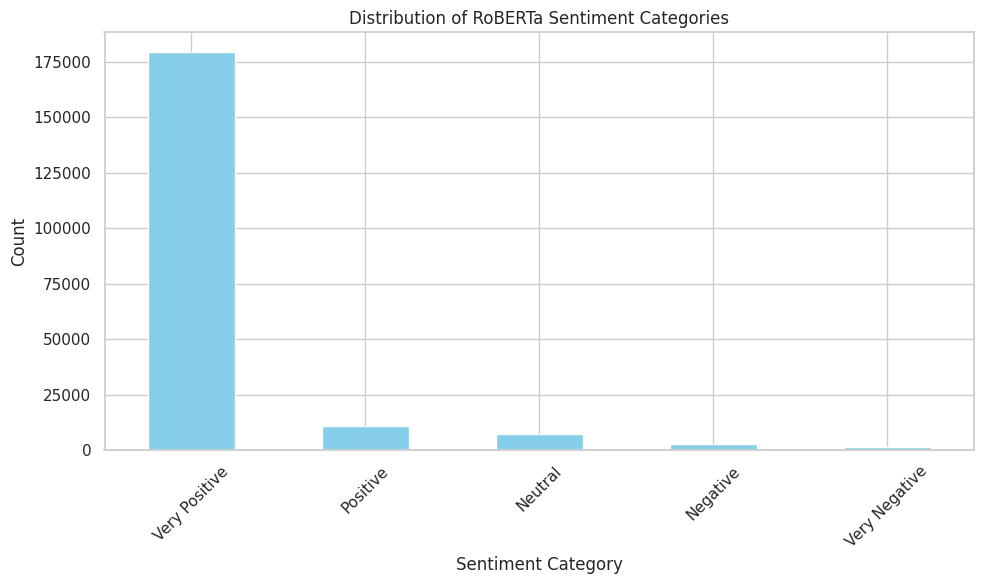

In [48]:
# Define sentiment categories based on compound scores
def categorize_roberta_sentiment(compound):
    if pd.isna(compound):
        return 'Unknown'
    if compound <= -0.75:
        return 'Very Negative'
    elif compound <= -0.25:
        return 'Negative'
    elif compound < 0.25:
        return 'Neutral'
    elif compound < 0.75:
        return 'Positive'
    else:
        return 'Very Positive'

# Add sentiment category column
if 'roberta_compound' in cleaned.columns:
    cleaned['roberta_sentiment_category'] = cleaned['roberta_compound'].apply(categorize_roberta_sentiment)

    # Display distribution of sentiment categories
    sentiment_counts = cleaned['roberta_sentiment_category'].value_counts()
    print("\nRoBERTa Sentiment distribution:")
    print(sentiment_counts)

    # Visualize sentiment distribution
    plt.figure(figsize=(10, 6))
    sentiment_counts.plot(kind='bar', color='skyblue')
    plt.title('Distribution of RoBERTa Sentiment Categories')
    plt.xlabel('Sentiment Category')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


Hotel Property Summary (sorted by average RoBERTa sentiment):


listing_id  Avg_Sentiment  Median_Sentiment  Sentiment_StdDev  Review_Count  Avg_Positivity  Avg_Negativity Sentiment_Distribution
0  1098336571860719799       0.981018          0.981018               NaN             1        0.990468        0.002821   {'Very Positive': 1}
1  1167743476154785270       0.980195          0.980195               NaN             1        0.990051        0.002255   {'Very Positive': 1}
2  1108031476164452855       0.979801          0.979801               NaN             1        0.989852        0.002349   {'Very Positive': 1}
3  1005308642618381684       0.978771          0.978771               NaN             1        0.989336        0.003848   {'Very Positive': 1}
4             46490606       0.978639          0.978639               NaN             1        0.989265        0.002476   {'Very Positive': 1}
5  1142134333473999408      -0.854408         -0.854408               NaN             1        0.006293        0.924363   {'Very Negative': 1}
6  1162393008790550335      -0.859829         -0.859829               NaN             1        0.005117        0.927284   {'Very Negative': 1}
7  1100831938175779609      -0.869676         -0.869676               NaN             1        0.004625        0.932576   {'Very Negative': 1}
8   959106390780333661      -0.873613         -0.873613          0.037101             2        0.005060        0.934581   {'Very Negative': 2}
9             45559700      -0.873810         -0.873810               NaN             1        0.005304        0.934793   {'Very Negative': 1}

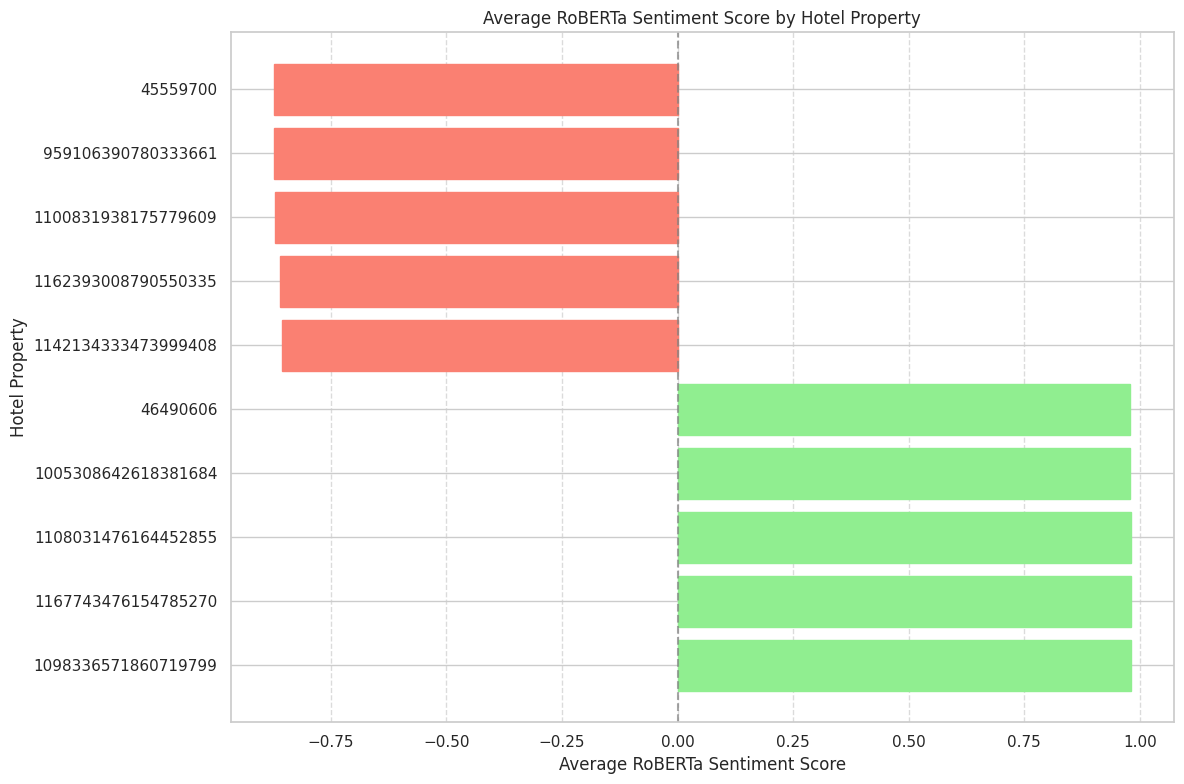

In [49]:
# Aggregate sentiment scores by hotel property
if hotel_column in cleaned.columns and 'roberta_compound' in  cleaned.columns and 'roberta_sentiment_category' in cleaned.columns:
    # Group by hotel property
    hotel_summary = cleaned.groupby(hotel_column).agg({
        'roberta_compound': ['mean', 'median', 'std', 'count'],
        'roberta_positive': ['mean'],
        'roberta_negative': ['mean'],
        'roberta_sentiment_category': lambda x: x.value_counts().to_dict()
    }).reset_index()

    # Flatten multi-level column names
    hotel_summary.columns = ['_'.join(col).strip('_') for col in hotel_summary.columns.values]

    # Rename columns for clarity
    hotel_summary = hotel_summary.rename(columns={
        f'{hotel_column}_': 'Hotel_Name',
        'roberta_compound_mean': 'Avg_Sentiment',
        'roberta_compound_median': 'Median_Sentiment',
        'roberta_compound_std': 'Sentiment_StdDev',
        'roberta_compound_count': 'Review_Count',
        'roberta_positive_mean': 'Avg_Positivity',
        'roberta_negative_mean': 'Avg_Negativity',
        'roberta_sentiment_category_<lambda>': 'Sentiment_Distribution'
    })

    # Sort by average sentiment score (descending)
    hotel_summary = hotel_summary.sort_values('Avg_Sentiment', ascending=False)
    # Keep only top 5 and bottom 5
    top_5 = hotel_summary.head(5)
    bottom_5 = hotel_summary.tail(5)
    hotel_summary = pd.concat([top_5, bottom_5], ignore_index=True)

    # Display the summary
    print("\nHotel Property Summary (sorted by average RoBERTa sentiment):")
    display(hotel_summary)

    # Create a new column for the most common sentiment category
    def get_most_common_sentiment(sentiment_dict):
        if not sentiment_dict:
            return 'Unknown'
        return max(sentiment_dict.items(), key=lambda x: x[1])[0]

    hotel_summary['Most_Common_Sentiment'] = hotel_summary['Sentiment_Distribution'].apply(get_most_common_sentiment)

    # Create visualization of average sentiment by hotel
    plt.figure(figsize=(12, 8))
    bars = plt.barh(hotel_summary['listing_id'], hotel_summary['Avg_Sentiment'], color='skyblue')

    # Color the bars based on sentiment (red for negative, green for positive)
    for i, bar in enumerate(bars):
        if hotel_summary['Avg_Sentiment'].iloc[i] < 0:
            bar.set_color('salmon')
        else:
            bar.set_color('lightgreen')

    plt.axvline(x=0, color='gray', linestyle='--', alpha=0.7)
    plt.xlabel('Average RoBERTa Sentiment Score')
    plt.ylabel('Hotel Property')
    plt.title('Average RoBERTa Sentiment Score by Hotel Property')
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
else:
    if hotel_column not in cleaned.columns:
        print(f"Error: The hotel column '{hotel_column}' was not found in the dataframe.")
    else:
        print("Cannot perform hotel aggregation without RoBERTa sentiment analysis results.")

In [50]:
selected_ids = [
    "45559700", "959106390780333661", "1100831938175779609",
    "1162393008790550335", "1142134333473999408", "4690606",
    "1005308642618381684", "1108031476164452855", "1167743476154785270", "1098336571860719799"
]

# Convert listing_id column to string
cleaned['listing_id'] = cleaned['listing_id'].astype(str)

# Filter
filtered_comments = cleaned[cleaned['listing_id'].isin(selected_ids)]
pd.set_option('display.max_colwidth', None)
display(filtered_comments[['listing_id', 'comments']].head(10))

listing_id                                                                                                                                                                                                                                                                                                                                                                                                                       comments
5314     959106390780333661  The first room the shower did not work… gave us another room but the air conditioner did not work in that room, gave us another room and the toilet was not stable. Just an awful experience and will not go back to that hotel again. The smell was just horrible. Thank goodness I had the room for just an overnight stay but had I decided to stay longer I would have picked another hotel. I highly don’t recommend in.
28833   1005308642618381684                                                                                                                                                                                                                                                                                                                                      This place it’s just perfect !! Everything inside this house it’s clean and beautiful !!!
56931    959106390780333661                                                                                                                                                                                                                                                                                                 The lady that I spoke with heard me crying on the line and was rude and inconsiderate and did not help me or wanted to help me
59524   1100831938175779609                                                                                                                                                                                         This host never replied to me when I needed further directions about the stay. They did not give me a room number nor reply to 6 messages I sent about requiring about check in instructions. Do not stay here - this place is a scam.
87396   1098336571860719799                                                                                                                                                                                                                                                                                             Such a great set up and we loved that it was fully stocked!<br/>Super cute!!!<br/>And perfect location!<br/>Host was very helpful!
95525   1108031476164452855                                                                                                                                                                                                                                                                                                                                       Wonderful experience staying at this AirBNB in Dallas. Amazing location with lots to do!
100706             45559700                                                                                                                                                                                                                                                                                                      This guy is a scam artist please do not use. He left me stranded with no rooms available at the hotel he “booked” for me.
102198  1142134333473999408                                                                                                                                                                                                                                                                                                                               Responsive host but the place is not well kept and it could be improved. I overpaid for the stay
136522  1162393008790550335   

In [54]:
# Install and import wordcloud
!pip install wordcloud
from wordcloud import WordCloud
from collections import Counter
import nltk
from nltk.corpus import stopwords

# Download stopwords for visualization purposes only
nltk.download('stopwords')

# Define English stopwords (only used for word cloud visualization)
stop_words = set(stopwords.words('english'))
# Add additional common words that aren't meaningful for sentiment analysis
additional_stopwords = {'hotel', 'room', 'rooms', 'stayed', 'stay', 'would', 'could', 'one', 'also', 'get', 'got', 'day', 'night','place','unit','host','house','home','airbnb'}
stop_words.update(additional_stopwords)

# Function to generate word clouds for reviews by sentiment
def generate_word_cloud(texts, title, color_map='viridis'):
    # Combine all text
    combined_text = " ".join(texts.dropna())

    if not combined_text.strip():
        print(f"No text available for {title}")
        return None

    # For wordcloud visualization only, we'll remove stopwords
    # This doesn't affect the sentiment analysis which used the full text

    # Tokenize the text
    words = word_tokenize(combined_text.lower())

    # Filter out stopwords and short words for visualization
    meaningful_words = [word for word in words if word.isalpha() and word not in stop_words and len(word) > 2]
    meaningful_text = " ".join(meaningful_words)

    # Create and display word cloud (without stopwords)
    wordcloud = WordCloud(width=800, height=400,
                         background_color='white',
                         colormap=color_map,
                         max_words=100,
                         contour_width=1,
                         contour_color='steelblue')

    # Generate word cloud with meaningful words only
    wordcloud.generate(meaningful_text)

    # Display word cloud
    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Meaningful Words in {title}", fontsize=16)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

    # Count meaningful word frequency
    meaningful_word_freq = Counter(meaningful_words)

    print(f"\nMost frequent meaningful words in {title}:")
    for word, count in meaningful_word_freq.most_common(15):
        print(f"{word}: {count}")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Found 190245 positive reviews


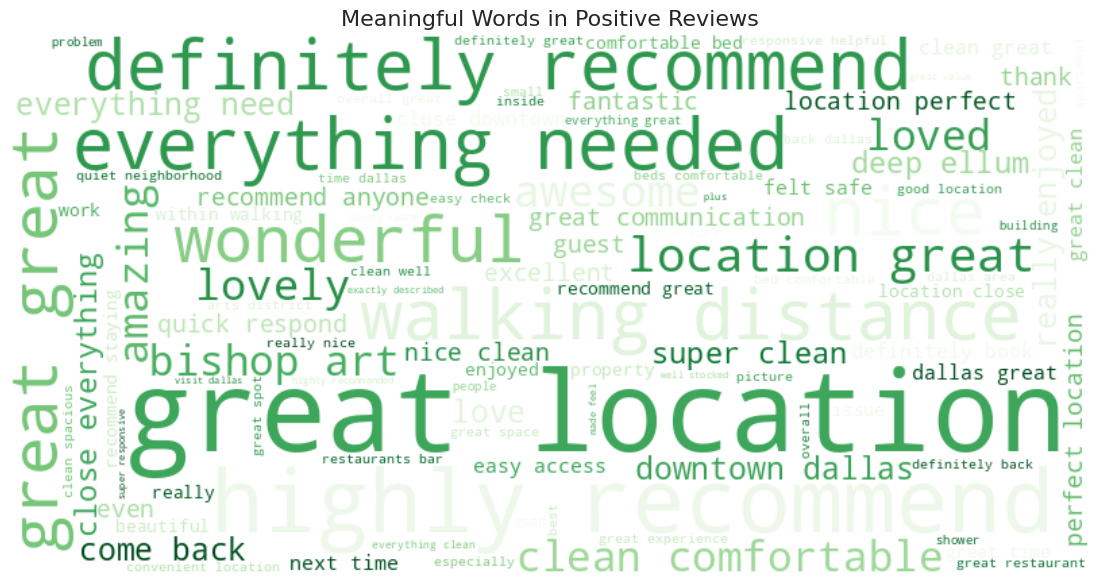


Most frequent meaningful words in Positive Reviews:
great: 111647
clean: 49696
location: 49073
nice: 34476
dallas: 34097
definitely: 32337
everything: 31800
recommend: 27540
comfortable: 27279
perfect: 25870
beautiful: 20594
easy: 20217
space: 20211
close: 19840
amazing: 18976
Found 4366 negative reviews


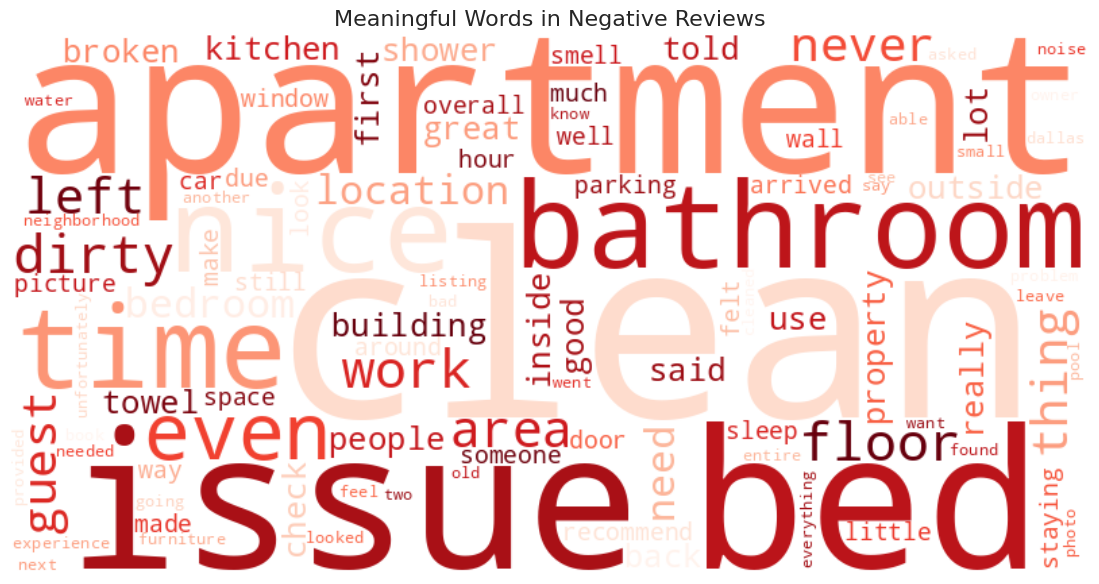


Most frequent meaningful words in Negative Reviews:
like: 1140
clean: 962
door: 852
location: 844
nice: 840
apartment: 822
time: 788
bed: 780
dirty: 773
bathroom: 734
check: 713
even: 702
work: 691
great: 688
parking: 676
Found 7290 neutral reviews


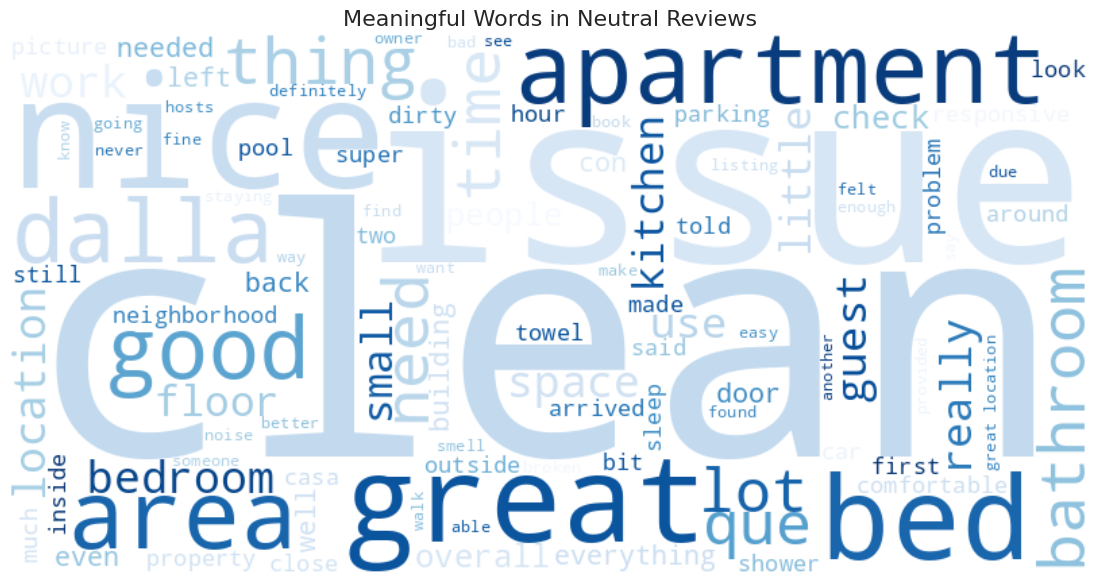


Most frequent meaningful words in Neutral Reviews:
muy: 1058
clean: 1020
great: 1019
location: 949
nice: 917
like: 752
good: 749
dallas: 676
apartment: 667
time: 607
area: 603
que: 598
bed: 577
parking: 562
check: 562


In [55]:
if 'roberta_compound' in cleaned.columns and text_column in cleaned.columns:
    # Positive reviews (compound score > 0.25)
    positive_reviews = cleaned[cleaned['roberta_compound'] > 0.25][text_column]
    print(f"Found {len(positive_reviews)} positive reviews")
    generate_word_cloud(positive_reviews, "Positive Reviews", 'Greens')

    # Negative reviews (compound score < -0.25)
    negative_reviews = cleaned[cleaned['roberta_compound'] < -0.25][text_column]
    print(f"Found {len(negative_reviews)} negative reviews")
    generate_word_cloud(negative_reviews, "Negative Reviews", 'Reds')

    # Neutral reviews
    neutral_reviews = cleaned[(cleaned['roberta_compound'] >= -0.25) & (cleaned['roberta_compound'] <= 0.25)][text_column]
    print(f"Found {len(neutral_reviews)} neutral reviews")
    generate_word_cloud(neutral_reviews, "Neutral Reviews", 'Blues')
else:
    print("Cannot generate word clouds without RoBERTa sentiment scores.")

**Model comparison**

Comparing RoBERTa and VADER sentiment analysis on 203615 reviews
Correlation between RoBERTa and VADER compound scores: 0.6496


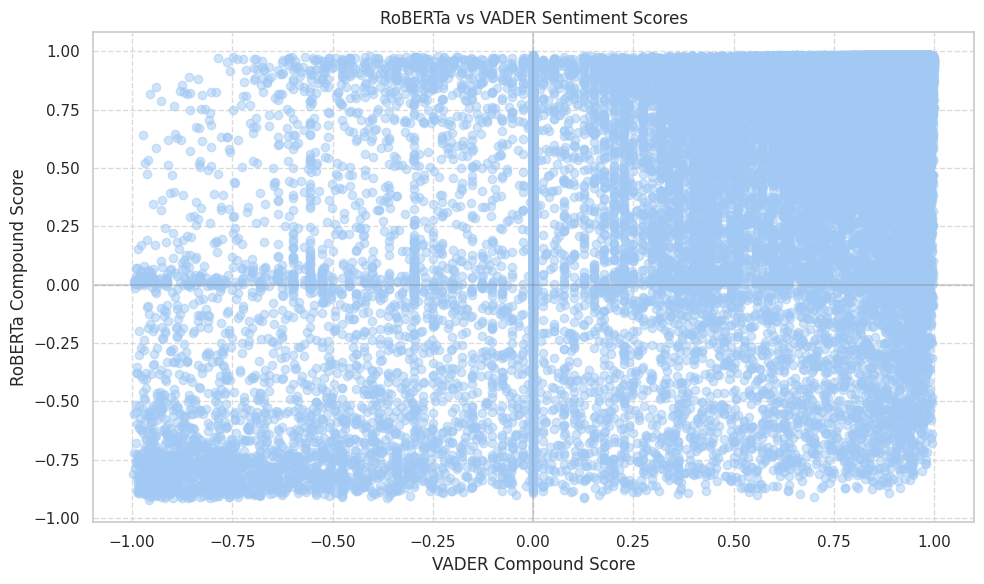

Agreement between RoBERTa and VADER sentiment categories: 73.80%


In [56]:
# Merge with current dataframe
try:
    comparison_df = pd.merge(
        cleaned[[hotel_column, text_column, 'roberta_compound', 'roberta_sentiment_category']],
        cleaned[[hotel_column, text_column, 'vader_compound', 'vader_sentiment_category']],
        on=[hotel_column, text_column],
        how='inner'
    )

    if len(comparison_df) > 0:
        print(f"Comparing RoBERTa and VADER sentiment analysis on {len(comparison_df)} reviews")

        # Calculate correlation
        correlation = comparison_df['roberta_compound'].corr(comparison_df['vader_compound'])
        print(f"Correlation between RoBERTa and VADER compound scores: {correlation:.4f}")

        # Create scatter plot
        plt.figure(figsize=(10, 6))
        plt.scatter(comparison_df['vader_compound'], comparison_df['roberta_compound'], alpha=0.5)
        plt.title('RoBERTa vs VADER Sentiment Scores')
        plt.xlabel('VADER Compound Score')
        plt.ylabel('RoBERTa Compound Score')
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.axhline(y=0, color='gray', linestyle='-', alpha=0.3)
        plt.axvline(x=0, color='gray', linestyle='-', alpha=0.3)
        plt.tight_layout()
        plt.show()

        # Calculate agreement percentage
        agreement = (comparison_df['roberta_sentiment_category'] == comparison_df['vader_sentiment_category']).mean() * 100
        print(f"Agreement between RoBERTa and VADER sentiment categories: {agreement:.2f}%")
except Exception as e:
    print(f"Could not compare with VADER results: {e}")


Regression Results for Review Scores Rating:
                             OLS Regression Results                             
Dep. Variable:     review_scores_rating   R-squared:                       0.075
Model:                              OLS   Adj. R-squared:                  0.075
Method:                   Least Squares   F-statistic:                     8158.
Date:                  Thu, 08 May 2025   Prob (F-statistic):               0.00
Time:                          02:35:12   Log-Likelihood:                 74871.
No. Observations:                201901   AIC:                        -1.497e+05
Df Residuals:                    201898   BIC:                        -1.497e+05
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------

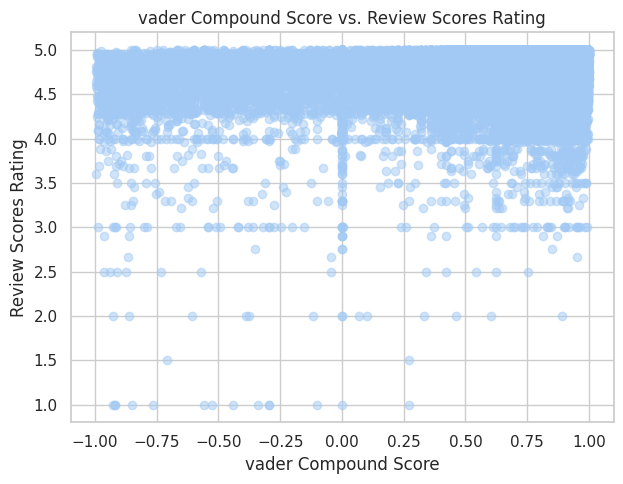

In [57]:
#import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt


cleaned.replace([np.inf, -np.inf], np.nan, inplace=True)
features = ['vader_compound', 'roberta_compound']
X = cleaned[features]
y_price = cleaned['price']
y_rating = cleaned['review_scores_rating']

X.dropna(inplace=True)
y_price = y_price[X.index]
y_rating = y_rating[X.index]


# Linear regression for review_scores_rating
X_rating = sm.add_constant(X)
model_rating = sm.OLS(y_rating, X_rating).fit()
print("\nRegression Results for Review Scores Rating:")
print(model_rating.summary())

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 2)
plt.scatter(X['vader_compound'], y_rating, alpha=0.5)
plt.title('vader Compound Score vs. Review Scores Rating')
plt.xlabel('vader Compound Score')
plt.ylabel('Review Scores Rating')

plt.tight_layout()
plt.show()